# 05 — Build All Zones

**Phase 2a: Feature Engineering — Build & Cache**

This notebook builds and caches feature matrices for **all 5 Norwegian bidding zones** in one go. Run this once to prepare all data for modeling.

## Zones

| Zone | Region | City | Weather station |
|------|--------|------|----------------|
| NO_1 | Øst-Norge | Oslo | SN18700 (Blindern) |
| NO_2 | Sør-Norge | Kristiansand | SN39040 (Kjevik) |
| NO_3 | Midt-Norge | Trondheim | SN68860 (Voll) |
| NO_4 | Nord-Norge | Tromsø | SN90450 |
| NO_5 | Vest-Norge | Bergen | SN50540 (Florida) |

In [1]:
import sys
import time
from pathlib import Path

PROJECT_ROOT = str(Path.cwd().parent) if Path("../src").exists() else str(Path.cwd())
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(name)s %(levelname)s %(message)s")

from src.features.build_features import (
    build_all_zones_feature_matrix, plot_feature_summary,
    ALL_ZONES, ZONE_LABELS,
)

START, END = "2020-01-01", "2026-02-21"

## Build all zones

This fetches weather data for any zones that aren't cached yet (requires Frost API key in `.env`), then builds the full feature matrix for each zone.

In [2]:
t0 = time.time()
all_dfs = build_all_zones_feature_matrix(START, END)
elapsed = time.time() - t0

print(f"\nDone in {elapsed:.1f}s — built {len(all_dfs)}/{len(ALL_ZONES)} zones")

2026-02-24 17:43:35,276 src.features.build_features INFO Building features for NO_1 (Øst-Norge (Oslo))


2026-02-24 17:43:35,277 src.features.build_features INFO Building feature matrix for NO_1 (2020-01-01 to 2026-02-21)


2026-02-24 17:43:35,517 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-24 17:43:35,518 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_1_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:35,602 src.features.build_features INFO Weather features (NO_1): 53688 rows, 5 columns


2026-02-24 17:43:35,604 src.features.build_features INFO Merged weather: +5 columns


2026-02-24 17:43:35,604 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:35,607 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-24 17:43:35,617 src.features.build_features INFO Merged FX: +1 columns


2026-02-24 17:43:35,618 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-24 17:43:35,661 src.data.fetch_electricity INFO Fetching prices for NO_1: 2020-01-01 to 2020-12-31


2026-02-24 17:43:39,049 src.data.fetch_electricity INFO Cached prices for NO_1 2020 → entsoe_prices_NO_1_2020.parquet


2026-02-24 17:43:41,052 src.data.fetch_electricity INFO Fetching prices for NO_1: 2021-01-01 to 2021-12-31


2026-02-24 17:43:44,358 src.data.fetch_electricity INFO Cached prices for NO_1 2021 → entsoe_prices_NO_1_2021.parquet


2026-02-24 17:43:46,363 src.data.fetch_electricity INFO Loading cached prices for NO_1 2022


2026-02-24 17:43:46,367 src.data.fetch_electricity INFO Loading cached prices for NO_1 2023


2026-02-24 17:43:46,369 src.data.fetch_electricity INFO Loading cached prices for NO_1 2024


2026-02-24 17:43:46,372 src.data.fetch_electricity INFO Loading cached prices for NO_1 2025


2026-02-24 17:43:46,374 src.data.fetch_electricity INFO Loading cached prices for NO_1 2026


2026-02-24 17:43:46,384 src.features.build_features INFO Price features: 59020 rows, 8 columns


2026-02-24 17:43:46,387 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-24 17:43:46,387 src.features.build_features INFO ENTSO-E price features (NO_1): 59020 rows, 11 columns


2026-02-24 17:43:46,389 src.features.build_features INFO Merged ENTSO-E price features: +11 columns


2026-02-24 17:43:46,395 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-24 17:43:46,402 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-24 17:43:46,402 src.data.fetch_electricity INFO Loading cached load for NO_1 2020


2026-02-24 17:43:46,405 src.data.fetch_electricity INFO Loading cached load for NO_1 2021


2026-02-24 17:43:46,407 src.data.fetch_electricity INFO Loading cached load for NO_1 2022


2026-02-24 17:43:46,408 src.data.fetch_electricity INFO Loading cached load for NO_1 2023


2026-02-24 17:43:46,410 src.data.fetch_electricity INFO Loading cached load for NO_1 2024


2026-02-24 17:43:46,412 src.data.fetch_electricity INFO Loading cached load for NO_1 2025


2026-02-24 17:43:46,414 src.data.fetch_electricity INFO Loading cached load for NO_1 2026


2026-02-24 17:43:46,417 src.features.build_features INFO ENTSO-E load features (NO_1): 78093 rows, 4 columns


2026-02-24 17:43:46,418 src.features.build_features INFO Merged ENTSO-E load: +4 columns


2026-02-24 17:43:46,423 src.data.fetch_electricity INFO Loading cached generation for NO_1 2020


2026-02-24 17:43:46,426 src.data.fetch_electricity INFO Loading cached generation for NO_1 2021


2026-02-24 17:43:46,428 src.data.fetch_electricity INFO Loading cached generation for NO_1 2022


2026-02-24 17:43:46,430 src.data.fetch_electricity INFO Loading cached generation for NO_1 2023


2026-02-24 17:43:46,433 src.data.fetch_electricity INFO Loading cached generation for NO_1 2024


2026-02-24 17:43:46,435 src.data.fetch_electricity INFO Loading cached generation for NO_1 2025


2026-02-24 17:43:46,442 src.data.fetch_electricity INFO Loading cached generation for NO_1 2026


2026-02-24 17:43:46,464 src.features.build_features INFO ENTSO-E generation features (NO_1): 76437 rows, 5 columns


2026-02-24 17:43:46,466 src.features.build_features INFO Merged ENTSO-E generation: +5 columns


2026-02-24 17:43:46,466 src.data.fetch_electricity INFO Loading cached flow_NO_1_SE_3 2020


2026-02-24 17:43:46,468 src.data.fetch_electricity INFO Loading cached flow_NO_1_SE_3 2021


2026-02-24 17:43:46,470 src.data.fetch_electricity INFO Loading cached flow_NO_1_SE_3 2022


2026-02-24 17:43:46,472 src.data.fetch_electricity INFO Loading cached flow_NO_1_SE_3 2023


2026-02-24 17:43:46,473 src.data.fetch_electricity INFO Loading cached flow_NO_1_SE_3 2024


2026-02-24 17:43:46,475 src.data.fetch_electricity INFO Loading cached flow_NO_1_SE_3 2025


2026-02-24 17:43:46,476 src.data.fetch_electricity INFO Loading cached flow_NO_1_SE_3 2026


2026-02-24 17:43:46,480 src.data.fetch_electricity INFO Loading cached prices_SE_3 for SE_3 2020


2026-02-24 17:43:46,483 src.data.fetch_electricity INFO Loading cached prices_SE_3 for SE_3 2021


2026-02-24 17:43:46,485 src.data.fetch_electricity INFO Loading cached prices_SE_3 for SE_3 2022


2026-02-24 17:43:46,486 src.data.fetch_electricity INFO Loading cached prices_SE_3 for SE_3 2023


2026-02-24 17:43:46,488 src.data.fetch_electricity INFO Loading cached prices_SE_3 for SE_3 2024


2026-02-24 17:43:46,490 src.data.fetch_electricity INFO Loading cached prices_SE_3 for SE_3 2025


2026-02-24 17:43:46,491 src.data.fetch_electricity INFO Loading cached prices_SE_3 for SE_3 2026


2026-02-24 17:43:46,502 src.features.build_features INFO ENTSO-E flow features (NO_1): 53833 rows, 5 columns


2026-02-24 17:43:46,503 src.features.build_features INFO Merged ENTSO-E flows: +5 columns


2026-02-24 17:43:46,503 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:46,512 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-24 17:43:46,521 src.features.build_features INFO Merged commodities: +5 columns


2026-02-24 17:43:46,521 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-24 17:43:46,523 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-24 17:43:46,525 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-24 17:43:46,577 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-24 17:43:46,578 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-24 17:43:46,581 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-24 17:43:46,597 src.features.build_features INFO Reservoir features (NO_1): 320 rows, 5 columns


2026-02-24 17:43:46,599 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-24 17:43:46,613 src.features.build_features INFO Feature matrix: 53833 rows x 68 columns, 2027 total missing values


2026-02-24 17:43:46,614 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-24 17:43:46,614 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-24 17:43:46,614 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-24 17:43:46,614 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-24 17:43:46,614 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-24 17:43:46,614 src.features.build_features INFO   price_lag_1h: 1 missing (0.0%)


2026-02-24 17:43:46,615 src.features.build_features INFO   price_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:46,615 src.features.build_features INFO   price_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:46,615 src.features.build_features INFO   price_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:43:46,615 src.features.build_features INFO   price_diff_24h: 24 missing (0.0%)


2026-02-24 17:43:46,615 src.features.build_features INFO   price_diff_168h: 168 missing (0.3%)


2026-02-24 17:43:46,616 src.features.build_features INFO   price_nok_mwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:43:46,616 src.features.build_features INFO   price_nok_mwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:46,616 src.features.build_features INFO   price_nok_mwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:46,616 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:43:46,616 src.features.build_features INFO   price_nok_mwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:43:46,616 src.features.build_features INFO   price_nok_mwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:43:46,617 src.features.build_features INFO   price_nok_kwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:43:46,617 src.features.build_features INFO   price_nok_kwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:46,617 src.features.build_features INFO   price_nok_kwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:46,617 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:43:46,617 src.features.build_features INFO   price_nok_kwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:43:46,617 src.features.build_features INFO   price_nok_kwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:43:46,617 src.features.build_features INFO   load_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:46,618 src.features.build_features INFO   load_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:46,618 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-24 17:43:46,618 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-24 17:43:46,618 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-24 17:43:46,618 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-24 17:43:46,618 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-24 17:43:46,618 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-24 17:43:46,732 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_1_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:46,733 src.features.build_features INFO Building features for NO_2 (Sør-Norge (Kristiansand))


2026-02-24 17:43:46,734 src.features.build_features INFO Building feature matrix for NO_2 (2020-01-01 to 2026-02-21)


2026-02-24 17:43:46,882 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-24 17:43:46,883 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_2_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:46,887 src.features.build_features INFO Weather features (NO_2): 53688 rows, 5 columns


2026-02-24 17:43:46,888 src.features.build_features INFO Merged weather: +5 columns


2026-02-24 17:43:46,888 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:46,891 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-24 17:43:46,898 src.features.build_features INFO Merged FX: +1 columns


2026-02-24 17:43:46,898 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-24 17:43:46,899 src.data.fetch_electricity INFO Fetching prices for NO_2: 2020-01-01 to 2020-12-31


2026-02-24 17:43:48,727 src.data.fetch_electricity INFO Cached prices for NO_2 2020 → entsoe_prices_NO_2_2020.parquet


2026-02-24 17:43:50,731 src.data.fetch_electricity INFO Fetching prices for NO_2: 2021-01-01 to 2021-12-31


2026-02-24 17:43:52,685 src.data.fetch_electricity INFO Cached prices for NO_2 2021 → entsoe_prices_NO_2_2021.parquet


2026-02-24 17:43:54,688 src.data.fetch_electricity INFO Loading cached prices for NO_2 2022


2026-02-24 17:43:54,695 src.data.fetch_electricity INFO Loading cached prices for NO_2 2023


2026-02-24 17:43:54,699 src.data.fetch_electricity INFO Loading cached prices for NO_2 2024


2026-02-24 17:43:54,701 src.data.fetch_electricity INFO Loading cached prices for NO_2 2025


2026-02-24 17:43:54,703 src.data.fetch_electricity INFO Loading cached prices for NO_2 2026


2026-02-24 17:43:54,709 src.features.build_features INFO Price features: 59020 rows, 8 columns


2026-02-24 17:43:54,710 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-24 17:43:54,711 src.features.build_features INFO ENTSO-E price features (NO_2): 59020 rows, 11 columns


2026-02-24 17:43:54,713 src.features.build_features INFO Merged ENTSO-E price features: +11 columns


2026-02-24 17:43:54,719 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-24 17:43:54,720 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-24 17:43:54,721 src.data.fetch_electricity INFO Loading cached load for NO_2 2020


2026-02-24 17:43:54,723 src.data.fetch_electricity INFO Loading cached load for NO_2 2021


2026-02-24 17:43:54,725 src.data.fetch_electricity INFO Loading cached load for NO_2 2022


2026-02-24 17:43:54,727 src.data.fetch_electricity INFO Loading cached load for NO_2 2023


2026-02-24 17:43:54,729 src.data.fetch_electricity INFO Loading cached load for NO_2 2024


2026-02-24 17:43:54,730 src.data.fetch_electricity INFO Loading cached load for NO_2 2025


2026-02-24 17:43:54,732 src.data.fetch_electricity INFO Loading cached load for NO_2 2026


2026-02-24 17:43:54,735 src.features.build_features INFO ENTSO-E load features (NO_2): 70077 rows, 4 columns


2026-02-24 17:43:54,736 src.features.build_features INFO Merged ENTSO-E load: +4 columns


2026-02-24 17:43:54,737 src.data.fetch_electricity INFO Loading cached generation for NO_2 2020


2026-02-24 17:43:54,739 src.data.fetch_electricity INFO Loading cached generation for NO_2 2021


2026-02-24 17:43:54,741 src.data.fetch_electricity INFO Loading cached generation for NO_2 2022


2026-02-24 17:43:54,743 src.data.fetch_electricity INFO Loading cached generation for NO_2 2023


2026-02-24 17:43:54,745 src.data.fetch_electricity INFO Loading cached generation for NO_2 2024


2026-02-24 17:43:54,747 src.data.fetch_electricity INFO Loading cached generation for NO_2 2025


2026-02-24 17:43:54,751 src.data.fetch_electricity INFO Loading cached generation for NO_2 2026


2026-02-24 17:43:54,774 src.features.build_features INFO ENTSO-E generation features (NO_2): 68421 rows, 5 columns


2026-02-24 17:43:54,777 src.features.build_features INFO Merged ENTSO-E generation: +5 columns


2026-02-24 17:43:54,779 src.data.fetch_electricity INFO Loading cached flow_NO_2_DK_1 2020


2026-02-24 17:43:54,783 src.data.fetch_electricity INFO Loading cached flow_NO_2_DK_1 2021


2026-02-24 17:43:54,787 src.data.fetch_electricity INFO Loading cached flow_NO_2_DK_1 2022


2026-02-24 17:43:54,790 src.data.fetch_electricity INFO Loading cached flow_NO_2_DK_1 2023


2026-02-24 17:43:54,793 src.data.fetch_electricity INFO Loading cached flow_NO_2_DK_1 2024


2026-02-24 17:43:54,796 src.data.fetch_electricity INFO Loading cached flow_NO_2_DK_1 2025


2026-02-24 17:43:54,798 src.data.fetch_electricity INFO Loading cached flow_NO_2_DK_1 2026


2026-02-24 17:43:54,804 src.data.fetch_electricity INFO Loading cached prices_DK_1 for DK_1 2020


2026-02-24 17:43:54,806 src.data.fetch_electricity INFO Loading cached prices_DK_1 for DK_1 2021


2026-02-24 17:43:54,808 src.data.fetch_electricity INFO Loading cached prices_DK_1 for DK_1 2022


2026-02-24 17:43:54,809 src.data.fetch_electricity INFO Loading cached prices_DK_1 for DK_1 2023


2026-02-24 17:43:54,811 src.data.fetch_electricity INFO Loading cached prices_DK_1 for DK_1 2024


2026-02-24 17:43:54,813 src.data.fetch_electricity INFO Loading cached prices_DK_1 for DK_1 2025


2026-02-24 17:43:54,815 src.data.fetch_electricity INFO Loading cached prices_DK_1 for DK_1 2026


2026-02-24 17:43:54,822 src.data.fetch_electricity INFO Loading cached flow_NO_2_NL 2020


2026-02-24 17:43:54,825 src.data.fetch_electricity INFO Loading cached flow_NO_2_NL 2021


2026-02-24 17:43:54,828 src.data.fetch_electricity INFO Loading cached flow_NO_2_NL 2022


2026-02-24 17:43:54,832 src.data.fetch_electricity INFO Loading cached flow_NO_2_NL 2023


2026-02-24 17:43:54,835 src.data.fetch_electricity INFO Loading cached flow_NO_2_NL 2024


2026-02-24 17:43:54,838 src.data.fetch_electricity INFO Loading cached flow_NO_2_NL 2025


2026-02-24 17:43:54,843 src.data.fetch_electricity INFO Loading cached flow_NO_2_NL 2026


2026-02-24 17:43:54,854 src.data.fetch_electricity INFO Loading cached prices_NL for NL 2020


2026-02-24 17:43:54,857 src.data.fetch_electricity INFO Loading cached prices_NL for NL 2021


2026-02-24 17:43:54,858 src.data.fetch_electricity INFO Loading cached prices_NL for NL 2022


2026-02-24 17:43:54,859 src.data.fetch_electricity INFO Loading cached prices_NL for NL 2023


2026-02-24 17:43:54,861 src.data.fetch_electricity INFO Loading cached prices_NL for NL 2024


2026-02-24 17:43:54,862 src.data.fetch_electricity INFO Loading cached prices_NL for NL 2025


2026-02-24 17:43:54,864 src.data.fetch_electricity INFO Loading cached prices_NL for NL 2026


2026-02-24 17:43:54,868 src.data.fetch_electricity INFO Loading cached flow_NO_2_DE_LU 2020


2026-02-24 17:43:54,870 src.data.fetch_electricity INFO Loading cached flow_NO_2_DE_LU 2021


2026-02-24 17:43:54,872 src.data.fetch_electricity INFO Loading cached flow_NO_2_DE_LU 2022


2026-02-24 17:43:54,874 src.data.fetch_electricity INFO Loading cached flow_NO_2_DE_LU 2023


2026-02-24 17:43:54,876 src.data.fetch_electricity INFO Loading cached flow_NO_2_DE_LU 2024


2026-02-24 17:43:54,878 src.data.fetch_electricity INFO Loading cached flow_NO_2_DE_LU 2025


2026-02-24 17:43:54,880 src.data.fetch_electricity INFO Loading cached flow_NO_2_DE_LU 2026


2026-02-24 17:43:54,886 src.data.fetch_electricity INFO Loading cached prices_DE_LU for DE_LU 2020


2026-02-24 17:43:54,888 src.data.fetch_electricity INFO Loading cached prices_DE_LU for DE_LU 2021


2026-02-24 17:43:54,890 src.data.fetch_electricity INFO Loading cached prices_DE_LU for DE_LU 2022


2026-02-24 17:43:54,891 src.data.fetch_electricity INFO Loading cached prices_DE_LU for DE_LU 2023


2026-02-24 17:43:54,893 src.data.fetch_electricity INFO Loading cached prices_DE_LU for DE_LU 2024


2026-02-24 17:43:54,894 src.data.fetch_electricity INFO Loading cached prices_DE_LU for DE_LU 2025


2026-02-24 17:43:54,896 src.data.fetch_electricity INFO Loading cached prices_DE_LU for DE_LU 2026


2026-02-24 17:43:54,901 src.data.fetch_electricity INFO Fetching flow_NO_2_GB: 2020-01-01 to 2020-12-31


2026-02-24 17:43:55,121 src.data.fetch_electricity ERROR Failed to fetch flow_NO_2_GB 2020: 


2026-02-24 17:43:57,123 src.data.fetch_electricity INFO Loading cached flow_NO_2_GB 2021


2026-02-24 17:43:57,127 src.data.fetch_electricity INFO Loading cached flow_NO_2_GB 2022


2026-02-24 17:43:57,130 src.data.fetch_electricity INFO Loading cached flow_NO_2_GB 2023


2026-02-24 17:43:57,132 src.data.fetch_electricity INFO Loading cached flow_NO_2_GB 2024


2026-02-24 17:43:57,135 src.data.fetch_electricity INFO Loading cached flow_NO_2_GB 2025


2026-02-24 17:43:57,138 src.data.fetch_electricity INFO Loading cached flow_NO_2_GB 2026


2026-02-24 17:43:57,154 src.features.build_features INFO ENTSO-E flow features (NO_2): 53833 rows, 12 columns


2026-02-24 17:43:57,156 src.features.build_features INFO Merged ENTSO-E flows: +12 columns


2026-02-24 17:43:57,156 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:57,162 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-24 17:43:57,171 src.features.build_features INFO Merged commodities: +5 columns


2026-02-24 17:43:57,172 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-24 17:43:57,174 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-24 17:43:57,178 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-24 17:43:57,239 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-24 17:43:57,240 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-24 17:43:57,244 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-24 17:43:57,265 src.features.build_features INFO Reservoir features (NO_2): 320 rows, 5 columns


2026-02-24 17:43:57,269 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-24 17:43:57,288 src.features.build_features INFO Feature matrix: 53833 rows x 75 columns, 20647 total missing values


2026-02-24 17:43:57,289 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-24 17:43:57,289 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-24 17:43:57,289 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-24 17:43:57,289 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-24 17:43:57,290 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-24 17:43:57,290 src.features.build_features INFO   price_lag_1h: 1 missing (0.0%)


2026-02-24 17:43:57,290 src.features.build_features INFO   price_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:57,290 src.features.build_features INFO   price_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:57,290 src.features.build_features INFO   price_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:43:57,290 src.features.build_features INFO   price_diff_24h: 24 missing (0.0%)


2026-02-24 17:43:57,291 src.features.build_features INFO   price_diff_168h: 168 missing (0.3%)


2026-02-24 17:43:57,291 src.features.build_features INFO   price_nok_mwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:43:57,291 src.features.build_features INFO   price_nok_mwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:57,291 src.features.build_features INFO   price_nok_mwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:57,291 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:43:57,292 src.features.build_features INFO   price_nok_mwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:43:57,292 src.features.build_features INFO   price_nok_mwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:43:57,292 src.features.build_features INFO   price_nok_kwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:43:57,292 src.features.build_features INFO   price_nok_kwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:57,292 src.features.build_features INFO   price_nok_kwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:57,292 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:43:57,292 src.features.build_features INFO   price_nok_kwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:43:57,293 src.features.build_features INFO   price_nok_kwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:43:57,293 src.features.build_features INFO   load_lag_24h: 24 missing (0.0%)


2026-02-24 17:43:57,293 src.features.build_features INFO   load_lag_168h: 168 missing (0.3%)


2026-02-24 17:43:57,293 src.features.build_features INFO   flow_no_2_delu: 5878 missing (10.9%)


2026-02-24 17:43:57,293 src.features.build_features INFO   flow_no_2_gb: 12742 missing (23.7%)


2026-02-24 17:43:57,293 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-24 17:43:57,293 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-24 17:43:57,294 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-24 17:43:57,294 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-24 17:43:57,294 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-24 17:43:57,294 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-24 17:43:57,426 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_2_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:57,427 src.features.build_features INFO Building features for NO_3 (Midt-Norge (Trondheim))


2026-02-24 17:43:57,428 src.features.build_features INFO Building feature matrix for NO_3 (2020-01-01 to 2026-02-21)


2026-02-24 17:43:57,591 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-24 17:43:57,593 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_3_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:57,600 src.features.build_features INFO Weather features (NO_3): 53688 rows, 5 columns


2026-02-24 17:43:57,603 src.features.build_features INFO Merged weather: +5 columns


2026-02-24 17:43:57,603 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-24 17:43:57,607 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-24 17:43:57,616 src.features.build_features INFO Merged FX: +1 columns


2026-02-24 17:43:57,616 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-24 17:43:57,617 src.data.fetch_electricity INFO Fetching prices for NO_3: 2020-01-01 to 2020-12-31


2026-02-24 17:43:59,587 src.data.fetch_electricity INFO Cached prices for NO_3 2020 → entsoe_prices_NO_3_2020.parquet


2026-02-24 17:44:01,593 src.data.fetch_electricity INFO Fetching prices for NO_3: 2021-01-01 to 2021-12-31


2026-02-24 17:44:03,708 src.data.fetch_electricity INFO Cached prices for NO_3 2021 → entsoe_prices_NO_3_2021.parquet


2026-02-24 17:44:05,714 src.data.fetch_electricity INFO Loading cached prices for NO_3 2022


2026-02-24 17:44:05,717 src.data.fetch_electricity INFO Loading cached prices for NO_3 2023


2026-02-24 17:44:05,719 src.data.fetch_electricity INFO Loading cached prices for NO_3 2024


2026-02-24 17:44:05,721 src.data.fetch_electricity INFO Loading cached prices for NO_3 2025


2026-02-24 17:44:05,723 src.data.fetch_electricity INFO Loading cached prices for NO_3 2026


2026-02-24 17:44:05,729 src.features.build_features INFO Price features: 59020 rows, 8 columns


2026-02-24 17:44:05,731 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-24 17:44:05,731 src.features.build_features INFO ENTSO-E price features (NO_3): 59020 rows, 11 columns


2026-02-24 17:44:05,734 src.features.build_features INFO Merged ENTSO-E price features: +11 columns


2026-02-24 17:44:05,741 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-24 17:44:05,742 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-24 17:44:05,743 src.data.fetch_electricity INFO Loading cached load for NO_3 2020


2026-02-24 17:44:05,745 src.data.fetch_electricity INFO Loading cached load for NO_3 2021


2026-02-24 17:44:05,747 src.data.fetch_electricity INFO Loading cached load for NO_3 2022


2026-02-24 17:44:05,749 src.data.fetch_electricity INFO Loading cached load for NO_3 2023


2026-02-24 17:44:05,751 src.data.fetch_electricity INFO Loading cached load for NO_3 2024


2026-02-24 17:44:05,753 src.data.fetch_electricity INFO Loading cached load for NO_3 2025


2026-02-24 17:44:05,755 src.data.fetch_electricity INFO Loading cached load for NO_3 2026


2026-02-24 17:44:05,758 src.features.build_features INFO ENTSO-E load features (NO_3): 78093 rows, 4 columns


2026-02-24 17:44:05,760 src.features.build_features INFO Merged ENTSO-E load: +4 columns


2026-02-24 17:44:05,760 src.data.fetch_electricity INFO Loading cached generation for NO_3 2020


2026-02-24 17:44:05,762 src.data.fetch_electricity INFO Loading cached generation for NO_3 2021


2026-02-24 17:44:05,765 src.data.fetch_electricity INFO Loading cached generation for NO_3 2022


2026-02-24 17:44:05,767 src.data.fetch_electricity INFO Loading cached generation for NO_3 2023


2026-02-24 17:44:05,769 src.data.fetch_electricity INFO Loading cached generation for NO_3 2024


2026-02-24 17:44:05,772 src.data.fetch_electricity INFO Loading cached generation for NO_3 2025


2026-02-24 17:44:05,775 src.data.fetch_electricity INFO Loading cached generation for NO_3 2026


2026-02-24 17:44:05,798 src.features.build_features INFO ENTSO-E generation features (NO_3): 76437 rows, 5 columns


2026-02-24 17:44:05,800 src.features.build_features INFO Merged ENTSO-E generation: +5 columns


2026-02-24 17:44:05,801 src.data.fetch_electricity INFO Loading cached flow_NO_3_SE_2 2020


2026-02-24 17:44:05,803 src.data.fetch_electricity INFO Loading cached flow_NO_3_SE_2 2021


2026-02-24 17:44:05,805 src.data.fetch_electricity INFO Loading cached flow_NO_3_SE_2 2022


2026-02-24 17:44:05,807 src.data.fetch_electricity INFO Loading cached flow_NO_3_SE_2 2023


2026-02-24 17:44:05,809 src.data.fetch_electricity INFO Loading cached flow_NO_3_SE_2 2024


2026-02-24 17:44:05,811 src.data.fetch_electricity INFO Loading cached flow_NO_3_SE_2 2025


2026-02-24 17:44:05,813 src.data.fetch_electricity INFO Loading cached flow_NO_3_SE_2 2026


2026-02-24 17:44:05,817 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2020


2026-02-24 17:44:05,819 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2021


2026-02-24 17:44:05,821 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2022


2026-02-24 17:44:05,822 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2023


2026-02-24 17:44:05,824 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2024


2026-02-24 17:44:05,826 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2025


2026-02-24 17:44:05,827 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2026


2026-02-24 17:44:05,838 src.features.build_features INFO ENTSO-E flow features (NO_3): 53833 rows, 5 columns


2026-02-24 17:44:05,839 src.features.build_features INFO Merged ENTSO-E flows: +5 columns


2026-02-24 17:44:05,839 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:05,844 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-24 17:44:05,853 src.features.build_features INFO Merged commodities: +5 columns


2026-02-24 17:44:05,853 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-24 17:44:05,855 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-24 17:44:05,857 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-24 17:44:05,910 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-24 17:44:05,910 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-24 17:44:05,914 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-24 17:44:05,931 src.features.build_features INFO Reservoir features (NO_3): 320 rows, 5 columns


2026-02-24 17:44:05,932 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-24 17:44:05,994 src.features.build_features INFO Feature matrix: 53833 rows x 68 columns, 2027 total missing values


2026-02-24 17:44:05,994 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-24 17:44:05,995 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-24 17:44:05,995 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-24 17:44:05,995 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-24 17:44:05,995 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-24 17:44:05,995 src.features.build_features INFO   price_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:05,995 src.features.build_features INFO   price_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:05,996 src.features.build_features INFO   price_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:05,996 src.features.build_features INFO   price_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:05,996 src.features.build_features INFO   price_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:05,996 src.features.build_features INFO   price_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:05,996 src.features.build_features INFO   price_nok_mwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:05,997 src.features.build_features INFO   price_nok_mwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:05,997 src.features.build_features INFO   price_nok_mwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:05,997 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:05,997 src.features.build_features INFO   price_nok_mwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:05,997 src.features.build_features INFO   price_nok_mwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:05,997 src.features.build_features INFO   price_nok_kwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:05,997 src.features.build_features INFO   price_nok_kwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:05,998 src.features.build_features INFO   price_nok_kwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:05,998 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:05,998 src.features.build_features INFO   price_nok_kwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:05,998 src.features.build_features INFO   price_nok_kwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:05,998 src.features.build_features INFO   load_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:05,998 src.features.build_features INFO   load_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:05,999 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-24 17:44:05,999 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-24 17:44:05,999 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-24 17:44:05,999 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-24 17:44:05,999 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-24 17:44:05,999 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-24 17:44:06,129 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_3_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:06,130 src.features.build_features INFO Building features for NO_4 (Nord-Norge (Tromsø))


2026-02-24 17:44:06,130 src.features.build_features INFO Building feature matrix for NO_4 (2020-01-01 to 2026-02-21)


2026-02-24 17:44:06,273 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-24 17:44:06,273 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_4_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:06,278 src.features.build_features INFO Weather features (NO_4): 53688 rows, 5 columns


2026-02-24 17:44:06,280 src.features.build_features INFO Merged weather: +5 columns


2026-02-24 17:44:06,280 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:06,282 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-24 17:44:06,290 src.features.build_features INFO Merged FX: +1 columns


2026-02-24 17:44:06,290 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-24 17:44:06,291 src.data.fetch_electricity INFO Fetching prices for NO_4: 2020-01-01 to 2020-12-31


2026-02-24 17:44:08,426 src.data.fetch_electricity INFO Cached prices for NO_4 2020 → entsoe_prices_NO_4_2020.parquet


2026-02-24 17:44:10,430 src.data.fetch_electricity INFO Fetching prices for NO_4: 2021-01-01 to 2021-12-31


2026-02-24 17:44:12,376 src.data.fetch_electricity INFO Cached prices for NO_4 2021 → entsoe_prices_NO_4_2021.parquet


2026-02-24 17:44:14,380 src.data.fetch_electricity INFO Loading cached prices for NO_4 2022


2026-02-24 17:44:14,383 src.data.fetch_electricity INFO Loading cached prices for NO_4 2023


2026-02-24 17:44:14,385 src.data.fetch_electricity INFO Loading cached prices for NO_4 2024


2026-02-24 17:44:14,387 src.data.fetch_electricity INFO Loading cached prices for NO_4 2025


2026-02-24 17:44:14,389 src.data.fetch_electricity INFO Loading cached prices for NO_4 2026


2026-02-24 17:44:14,395 src.features.build_features INFO Price features: 59020 rows, 8 columns


2026-02-24 17:44:14,397 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-24 17:44:14,397 src.features.build_features INFO ENTSO-E price features (NO_4): 59020 rows, 11 columns


2026-02-24 17:44:14,400 src.features.build_features INFO Merged ENTSO-E price features: +11 columns


2026-02-24 17:44:14,410 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-24 17:44:14,412 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-24 17:44:14,413 src.data.fetch_electricity INFO Loading cached load for NO_4 2020


2026-02-24 17:44:14,417 src.data.fetch_electricity INFO Loading cached load for NO_4 2021


2026-02-24 17:44:14,422 src.data.fetch_electricity INFO Loading cached load for NO_4 2022


2026-02-24 17:44:14,425 src.data.fetch_electricity INFO Loading cached load for NO_4 2023


2026-02-24 17:44:14,429 src.data.fetch_electricity INFO Loading cached load for NO_4 2024


2026-02-24 17:44:14,433 src.data.fetch_electricity INFO Loading cached load for NO_4 2025


2026-02-24 17:44:14,438 src.data.fetch_electricity INFO Loading cached load for NO_4 2026


2026-02-24 17:44:14,442 src.features.build_features INFO ENTSO-E load features (NO_4): 78093 rows, 4 columns


2026-02-24 17:44:14,443 src.features.build_features INFO Merged ENTSO-E load: +4 columns


2026-02-24 17:44:14,444 src.data.fetch_electricity INFO Loading cached generation for NO_4 2020


2026-02-24 17:44:14,446 src.data.fetch_electricity INFO Loading cached generation for NO_4 2021


2026-02-24 17:44:14,448 src.data.fetch_electricity INFO Loading cached generation for NO_4 2022


2026-02-24 17:44:14,450 src.data.fetch_electricity INFO Loading cached generation for NO_4 2023


2026-02-24 17:44:14,452 src.data.fetch_electricity INFO Loading cached generation for NO_4 2024


2026-02-24 17:44:14,454 src.data.fetch_electricity INFO Loading cached generation for NO_4 2025


2026-02-24 17:44:14,456 src.data.fetch_electricity INFO Loading cached generation for NO_4 2026


2026-02-24 17:44:14,473 src.features.build_features INFO ENTSO-E generation features (NO_4): 76437 rows, 5 columns


2026-02-24 17:44:14,475 src.features.build_features INFO Merged ENTSO-E generation: +5 columns


2026-02-24 17:44:14,476 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_1 2020


2026-02-24 17:44:14,479 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_1 2021


2026-02-24 17:44:14,481 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_1 2022


2026-02-24 17:44:14,484 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_1 2023


2026-02-24 17:44:14,488 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_1 2024


2026-02-24 17:44:14,494 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_1 2025


2026-02-24 17:44:14,498 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_1 2026


2026-02-24 17:44:14,506 src.data.fetch_electricity INFO Loading cached prices_SE_1 for SE_1 2020


2026-02-24 17:44:14,512 src.data.fetch_electricity INFO Loading cached prices_SE_1 for SE_1 2021


2026-02-24 17:44:14,519 src.data.fetch_electricity INFO Loading cached prices_SE_1 for SE_1 2022


2026-02-24 17:44:14,524 src.data.fetch_electricity INFO Loading cached prices_SE_1 for SE_1 2023


2026-02-24 17:44:14,529 src.data.fetch_electricity INFO Loading cached prices_SE_1 for SE_1 2024


2026-02-24 17:44:14,533 src.data.fetch_electricity INFO Loading cached prices_SE_1 for SE_1 2025


2026-02-24 17:44:14,537 src.data.fetch_electricity INFO Loading cached prices_SE_1 for SE_1 2026


2026-02-24 17:44:14,545 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_2 2020


2026-02-24 17:44:14,548 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_2 2021


2026-02-24 17:44:14,550 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_2 2022


2026-02-24 17:44:14,553 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_2 2023


2026-02-24 17:44:14,555 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_2 2024


2026-02-24 17:44:14,557 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_2 2025


2026-02-24 17:44:14,560 src.data.fetch_electricity INFO Loading cached flow_NO_4_SE_2 2026


2026-02-24 17:44:14,565 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2020


2026-02-24 17:44:14,566 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2021


2026-02-24 17:44:14,568 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2022


2026-02-24 17:44:14,570 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2023


2026-02-24 17:44:14,571 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2024


2026-02-24 17:44:14,573 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2025


2026-02-24 17:44:14,575 src.data.fetch_electricity INFO Loading cached prices_SE_2 for SE_2 2026


2026-02-24 17:44:14,582 src.data.fetch_electricity INFO Loading cached flow_NO_4_FI 2020


2026-02-24 17:44:14,586 src.data.fetch_electricity INFO Loading cached flow_NO_4_FI 2021


2026-02-24 17:44:14,590 src.data.fetch_electricity INFO Loading cached flow_NO_4_FI 2022


2026-02-24 17:44:14,594 src.data.fetch_electricity INFO Loading cached flow_NO_4_FI 2023


2026-02-24 17:44:14,597 src.data.fetch_electricity INFO Loading cached flow_NO_4_FI 2024


2026-02-24 17:44:14,601 src.data.fetch_electricity INFO Loading cached flow_NO_4_FI 2025


2026-02-24 17:44:14,606 src.data.fetch_electricity INFO Loading cached flow_NO_4_FI 2026


2026-02-24 17:44:14,616 src.data.fetch_electricity INFO Loading cached prices_FI for FI 2020


2026-02-24 17:44:14,621 src.data.fetch_electricity INFO Loading cached prices_FI for FI 2021


2026-02-24 17:44:14,624 src.data.fetch_electricity INFO Loading cached prices_FI for FI 2022


2026-02-24 17:44:14,626 src.data.fetch_electricity INFO Loading cached prices_FI for FI 2023


2026-02-24 17:44:14,628 src.data.fetch_electricity INFO Loading cached prices_FI for FI 2024


2026-02-24 17:44:14,629 src.data.fetch_electricity INFO Loading cached prices_FI for FI 2025


2026-02-24 17:44:14,631 src.data.fetch_electricity INFO Loading cached prices_FI for FI 2026


2026-02-24 17:44:14,643 src.features.build_features INFO ENTSO-E flow features (NO_4): 53833 rows, 11 columns


2026-02-24 17:44:14,644 src.features.build_features INFO Merged ENTSO-E flows: +11 columns


2026-02-24 17:44:14,644 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:14,648 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-24 17:44:14,656 src.features.build_features INFO Merged commodities: +5 columns


2026-02-24 17:44:14,656 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-24 17:44:14,658 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-24 17:44:14,660 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-24 17:44:14,715 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-24 17:44:14,716 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-24 17:44:14,719 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-24 17:44:14,737 src.features.build_features INFO Reservoir features (NO_4): 320 rows, 5 columns


2026-02-24 17:44:14,739 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-24 17:44:14,755 src.features.build_features INFO Feature matrix: 53833 rows x 74 columns, 2027 total missing values


2026-02-24 17:44:14,756 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-24 17:44:14,756 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-24 17:44:14,756 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-24 17:44:14,757 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-24 17:44:14,757 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-24 17:44:14,757 src.features.build_features INFO   price_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:14,758 src.features.build_features INFO   price_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:14,758 src.features.build_features INFO   price_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:14,758 src.features.build_features INFO   price_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:14,759 src.features.build_features INFO   price_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:14,759 src.features.build_features INFO   price_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:14,759 src.features.build_features INFO   price_nok_mwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:14,759 src.features.build_features INFO   price_nok_mwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:14,760 src.features.build_features INFO   price_nok_mwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:14,760 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:14,761 src.features.build_features INFO   price_nok_mwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:14,761 src.features.build_features INFO   price_nok_mwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:14,761 src.features.build_features INFO   price_nok_kwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:14,761 src.features.build_features INFO   price_nok_kwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:14,762 src.features.build_features INFO   price_nok_kwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:14,762 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:14,762 src.features.build_features INFO   price_nok_kwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:14,762 src.features.build_features INFO   price_nok_kwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:14,763 src.features.build_features INFO   load_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:14,763 src.features.build_features INFO   load_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:14,763 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-24 17:44:14,764 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-24 17:44:14,764 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-24 17:44:14,764 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-24 17:44:14,764 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-24 17:44:14,765 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-24 17:44:14,910 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_4_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:14,911 src.features.build_features INFO Building features for NO_5 (Vest-Norge (Bergen))


2026-02-24 17:44:14,912 src.features.build_features INFO Building feature matrix for NO_5 (2020-01-01 to 2026-02-21)


2026-02-24 17:44:15,064 src.features.build_features INFO Calendar features: 53833 rows, 7 columns


2026-02-24 17:44:15,065 src.data.fetch_metro INFO Loading cached weather data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/weather_NO_5_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:15,072 src.features.build_features INFO Weather features (NO_5): 53688 rows, 5 columns


2026-02-24 17:44:15,075 src.features.build_features INFO Merged weather: +5 columns


2026-02-24 17:44:15,075 src.data.fetch_fx INFO Loading cached FX data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/fx_eur_nok_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:15,078 src.features.build_features INFO FX features: 2244 rows, 1 columns


2026-02-24 17:44:15,087 src.features.build_features INFO Merged FX: +1 columns


2026-02-24 17:44:15,087 src.features.build_features INFO Price features: skipped (no price data provided)


2026-02-24 17:44:15,088 src.data.fetch_electricity INFO Fetching prices for NO_5: 2020-01-01 to 2020-12-31


2026-02-24 17:44:17,162 src.data.fetch_electricity INFO Cached prices for NO_5 2020 → entsoe_prices_NO_5_2020.parquet


2026-02-24 17:44:19,168 src.data.fetch_electricity INFO Fetching prices for NO_5: 2021-01-01 to 2021-12-31


2026-02-24 17:44:21,534 src.data.fetch_electricity INFO Cached prices for NO_5 2021 → entsoe_prices_NO_5_2021.parquet


2026-02-24 17:44:23,539 src.data.fetch_electricity INFO Loading cached prices for NO_5 2022


2026-02-24 17:44:23,543 src.data.fetch_electricity INFO Loading cached prices for NO_5 2023


2026-02-24 17:44:23,545 src.data.fetch_electricity INFO Loading cached prices for NO_5 2024


2026-02-24 17:44:23,548 src.data.fetch_electricity INFO Loading cached prices for NO_5 2025


2026-02-24 17:44:23,550 src.data.fetch_electricity INFO Loading cached prices for NO_5 2026


2026-02-24 17:44:23,561 src.features.build_features INFO Price features: 51005 rows, 8 columns


2026-02-24 17:44:23,564 src.features.build_features INFO Added NOK price columns (price_nok_mwh, price_nok_kwh)


2026-02-24 17:44:23,564 src.features.build_features INFO ENTSO-E price features (NO_5): 51005 rows, 11 columns


2026-02-24 17:44:23,567 src.features.build_features INFO Merged ENTSO-E price features: +11 columns


2026-02-24 17:44:23,573 src.features.build_features INFO NOK price features: 53833 rows, 16 columns


2026-02-24 17:44:23,574 src.features.build_features INFO Merged NOK price features: +16 columns


2026-02-24 17:44:23,574 src.data.fetch_electricity INFO Loading cached load for NO_5 2020


2026-02-24 17:44:23,576 src.data.fetch_electricity INFO Loading cached load for NO_5 2021


2026-02-24 17:44:23,592 src.data.fetch_electricity INFO Loading cached load for NO_5 2022


2026-02-24 17:44:23,595 src.data.fetch_electricity INFO Loading cached load for NO_5 2023


2026-02-24 17:44:23,602 src.data.fetch_electricity INFO Loading cached load for NO_5 2024


2026-02-24 17:44:23,604 src.data.fetch_electricity INFO Loading cached load for NO_5 2025


2026-02-24 17:44:23,608 src.data.fetch_electricity INFO Loading cached load for NO_5 2026


2026-02-24 17:44:23,611 src.features.build_features INFO ENTSO-E load features (NO_5): 62061 rows, 4 columns


2026-02-24 17:44:23,613 src.features.build_features INFO Merged ENTSO-E load: +4 columns


2026-02-24 17:44:23,613 src.data.fetch_electricity INFO Loading cached generation for NO_5 2020


2026-02-24 17:44:23,616 src.data.fetch_electricity INFO Loading cached generation for NO_5 2021


2026-02-24 17:44:23,618 src.data.fetch_electricity INFO Loading cached generation for NO_5 2022


2026-02-24 17:44:23,620 src.data.fetch_electricity INFO Loading cached generation for NO_5 2023


2026-02-24 17:44:23,622 src.data.fetch_electricity INFO Loading cached generation for NO_5 2024


2026-02-24 17:44:23,625 src.data.fetch_electricity INFO Loading cached generation for NO_5 2025


2026-02-24 17:44:23,629 src.data.fetch_electricity INFO Loading cached generation for NO_5 2026


2026-02-24 17:44:23,652 src.features.build_features INFO ENTSO-E generation features (NO_5): 68421 rows, 5 columns


2026-02-24 17:44:23,654 src.features.build_features INFO Merged ENTSO-E generation: +5 columns


2026-02-24 17:44:23,655 src.features.build_features INFO ENTSO-E flows: NO_5 has no international cables


2026-02-24 17:44:23,655 src.data.fetch_commodity INFO Loading cached commodity data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/commodity_yfinance_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:23,659 src.features.build_features INFO Commodity features: 2244 rows, 5 columns


2026-02-24 17:44:23,669 src.features.build_features INFO Merged commodities: +5 columns


2026-02-24 17:44:23,670 src.data.fetch_statnett INFO Loading cached physical flows from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_physical_flows.parquet


2026-02-24 17:44:23,674 src.data.fetch_statnett INFO Loading cached production/consumption from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/statnett_prod_cons.parquet


2026-02-24 17:44:23,679 src.features.build_features INFO Statnett features: 2244 rows, 4 columns


2026-02-24 17:44:23,735 src.features.build_features INFO Merged Statnett: +4 columns


2026-02-24 17:44:23,735 src.data.fetch_reservoir INFO Loading cached reservoir data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_all.parquet


2026-02-24 17:44:23,743 src.data.fetch_reservoir INFO Loading cached benchmark data from /Users/martin/Documents/GitHub/electricity_forecast/data/raw/reservoir_nve_benchmarks.parquet


2026-02-24 17:44:23,764 src.features.build_features INFO Reservoir features (NO_5): 320 rows, 5 columns


2026-02-24 17:44:23,767 src.features.build_features INFO Merged reservoir: +5 columns


2026-02-24 17:44:23,787 src.features.build_features INFO Feature matrix: 53833 rows x 63 columns, 2027 total missing values


2026-02-24 17:44:23,788 src.features.build_features INFO   temperature: 1 missing (0.0%)


2026-02-24 17:44:23,788 src.features.build_features INFO   wind_speed: 1 missing (0.0%)


2026-02-24 17:44:23,789 src.features.build_features INFO   precipitation: 1 missing (0.0%)


2026-02-24 17:44:23,789 src.features.build_features INFO   temperature_lag_24h: 25 missing (0.0%)


2026-02-24 17:44:23,790 src.features.build_features INFO   temperature_rolling_24h_mean: 1 missing (0.0%)


2026-02-24 17:44:23,790 src.features.build_features INFO   price_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:23,791 src.features.build_features INFO   price_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:23,791 src.features.build_features INFO   price_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:23,792 src.features.build_features INFO   price_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:23,792 src.features.build_features INFO   price_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:23,792 src.features.build_features INFO   price_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:23,793 src.features.build_features INFO   price_nok_mwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:23,793 src.features.build_features INFO   price_nok_mwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:23,794 src.features.build_features INFO   price_nok_mwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:23,794 src.features.build_features INFO   price_nok_mwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:23,795 src.features.build_features INFO   price_nok_mwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:23,795 src.features.build_features INFO   price_nok_mwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:23,795 src.features.build_features INFO   price_nok_kwh_lag_1h: 1 missing (0.0%)


2026-02-24 17:44:23,795 src.features.build_features INFO   price_nok_kwh_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:23,796 src.features.build_features INFO   price_nok_kwh_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:23,796 src.features.build_features INFO   price_nok_kwh_rolling_24h_std: 1 missing (0.0%)


2026-02-24 17:44:23,796 src.features.build_features INFO   price_nok_kwh_diff_24h: 24 missing (0.0%)


2026-02-24 17:44:23,796 src.features.build_features INFO   price_nok_kwh_diff_168h: 168 missing (0.3%)


2026-02-24 17:44:23,796 src.features.build_features INFO   load_lag_24h: 24 missing (0.0%)


2026-02-24 17:44:23,796 src.features.build_features INFO   load_lag_168h: 168 missing (0.3%)


2026-02-24 17:44:23,796 src.features.build_features INFO   ttf_gas_change_7d: 168 missing (0.3%)


2026-02-24 17:44:23,797 src.features.build_features INFO   reservoir_filling_pct: 96 missing (0.2%)


2026-02-24 17:44:23,797 src.features.build_features INFO   reservoir_filling_twh: 96 missing (0.2%)


2026-02-24 17:44:23,797 src.features.build_features INFO   reservoir_filling_change: 96 missing (0.2%)


2026-02-24 17:44:23,797 src.features.build_features INFO   reservoir_vs_median: 96 missing (0.2%)


2026-02-24 17:44:23,797 src.features.build_features INFO   reservoir_vs_min: 96 missing (0.2%)


2026-02-24 17:44:23,899 src.features.build_features INFO Cached feature matrix to /Users/martin/Documents/GitHub/electricity_forecast/data/processed/features_NO_5_2020-01-01_2026-02-21.parquet


2026-02-24 17:44:23,900 src.features.build_features INFO Built feature matrices for 5/5 zones: ['NO_1', 'NO_2', 'NO_3', 'NO_4', 'NO_5']



Done in 48.6s — built 5/5 zones


## Summary table

In [3]:
import pandas as pd

summary = []
for zone, df in all_dfs.items():
    missing = df.isna().sum().sum()
    total = df.shape[0] * df.shape[1]
    summary.append({
        "Zone": zone,
        "Region": ZONE_LABELS[zone],
        "Rows": f"{df.shape[0]:,}",
        "Columns": df.shape[1],
        "Missing": f"{missing:,}",
        "Missing %": f"{missing/total*100:.3f}%",
        "Temp range": f"{df['temperature'].min():.0f} to {df['temperature'].max():.0f}°C" if "temperature" in df.columns else "N/A",
    })

summary_df = pd.DataFrame(summary)
summary_df

Zone                    Region    Rows  Columns Missing Missing %  \
0  NO_1          Øst-Norge (Oslo)  53,833       68   2,027    0.055%   
1  NO_2  Sør-Norge (Kristiansand)  53,833       75  20,647    0.511%   
2  NO_3    Midt-Norge (Trondheim)  53,833       68   2,027    0.055%   
3  NO_4       Nord-Norge (Tromsø)  53,833       74   2,027    0.051%   
4  NO_5       Vest-Norge (Bergen)  53,833       63   2,027    0.060%   

    Temp range  
0  -23 to 33°C  
1  -21 to 29°C  
2  -20 to 32°C  
3  -14 to 30°C  
4  -11 to 30°C

## Cached Parquet files

In [4]:
processed_dir = Path("../data/processed")
total_size = 0
for f in sorted(processed_dir.glob("features_*.parquet")):
    size_kb = f.stat().st_size / 1024
    total_size += size_kb
    print(f"{f.name}: {size_kb:.0f} KB")

print(f"\nTotal: {total_size/1024:.1f} MB")

features_NO_1_2020-01-01_2026-02-21.parquet: 16811 KB
features_NO_1_2022-01-01_2026-01-01.parquet: 11369 KB
features_NO_2_2020-01-01_2026-02-21.parquet: 17699 KB
features_NO_2_2022-01-01_2026-01-01.parquet: 11650 KB
features_NO_3_2020-01-01_2026-02-21.parquet: 16276 KB
features_NO_3_2022-01-01_2026-01-01.parquet: 10849 KB
features_NO_4_2020-01-01_2026-02-21.parquet: 18033 KB
features_NO_4_2022-01-01_2026-01-01.parquet: 12118 KB
features_NO_5_2020-01-01_2026-02-21.parquet: 12555 KB
features_NO_5_2022-01-01_2026-01-01.parquet: 7864 KB

Total: 132.1 MB


## Generate summary plots for all zones

In [5]:
for zone, df in all_dfs.items():
    print(f"Generating plot for {zone}...")
    plot_feature_summary(df, zone)

print("\nAll plots saved to artifacts/")

Generating plot for NO_1...


2026-02-24 17:44:28,296 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_1.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_1.png
Generating plot for NO_2...


2026-02-24 17:44:31,826 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_2.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_2.png
Generating plot for NO_3...


2026-02-24 17:44:35,536 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_3.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_3.png
Generating plot for NO_4...


2026-02-24 17:44:39,384 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_4.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_4.png
Generating plot for NO_5...


2026-02-24 17:44:43,250 src.features.build_features INFO Saved feature summary plot to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_5.png


Visualization saved to /Users/martin/Documents/GitHub/electricity_forecast/artifacts/feature_summary_NO_5.png

All plots saved to artifacts/


## View saved plots


NO_1 — Øst-Norge (Oslo)


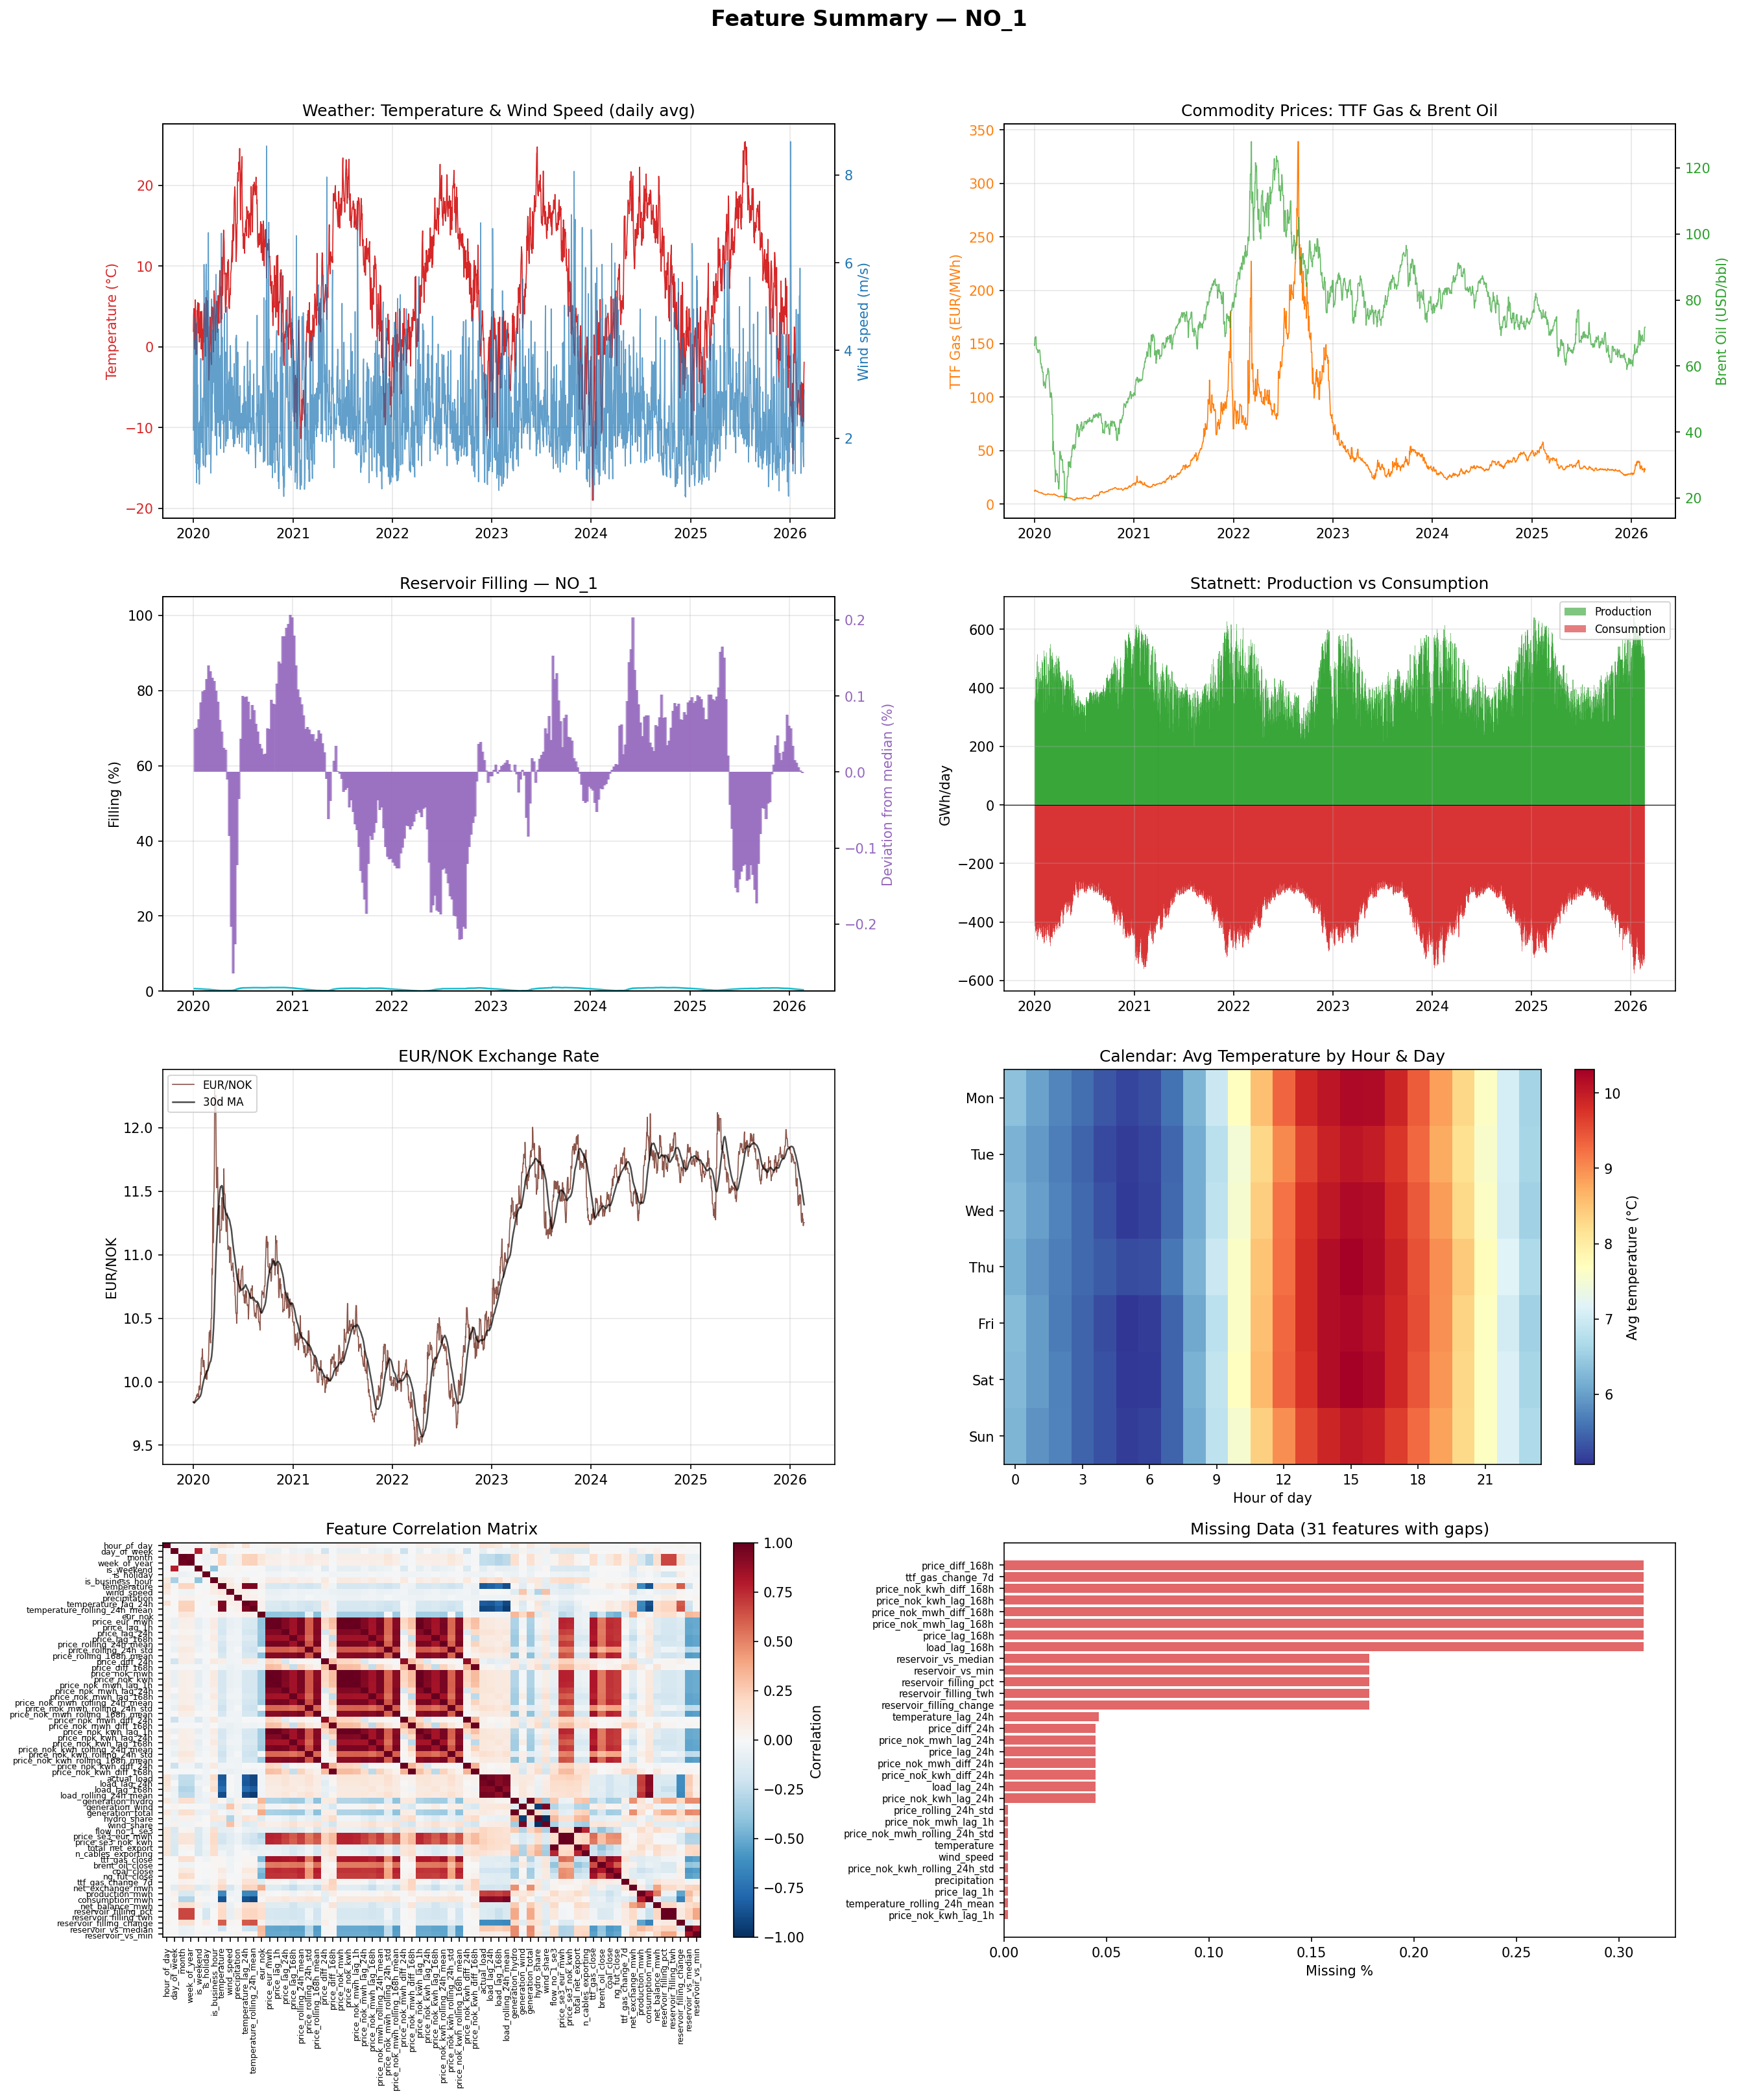


NO_2 — Sør-Norge (Kristiansand)


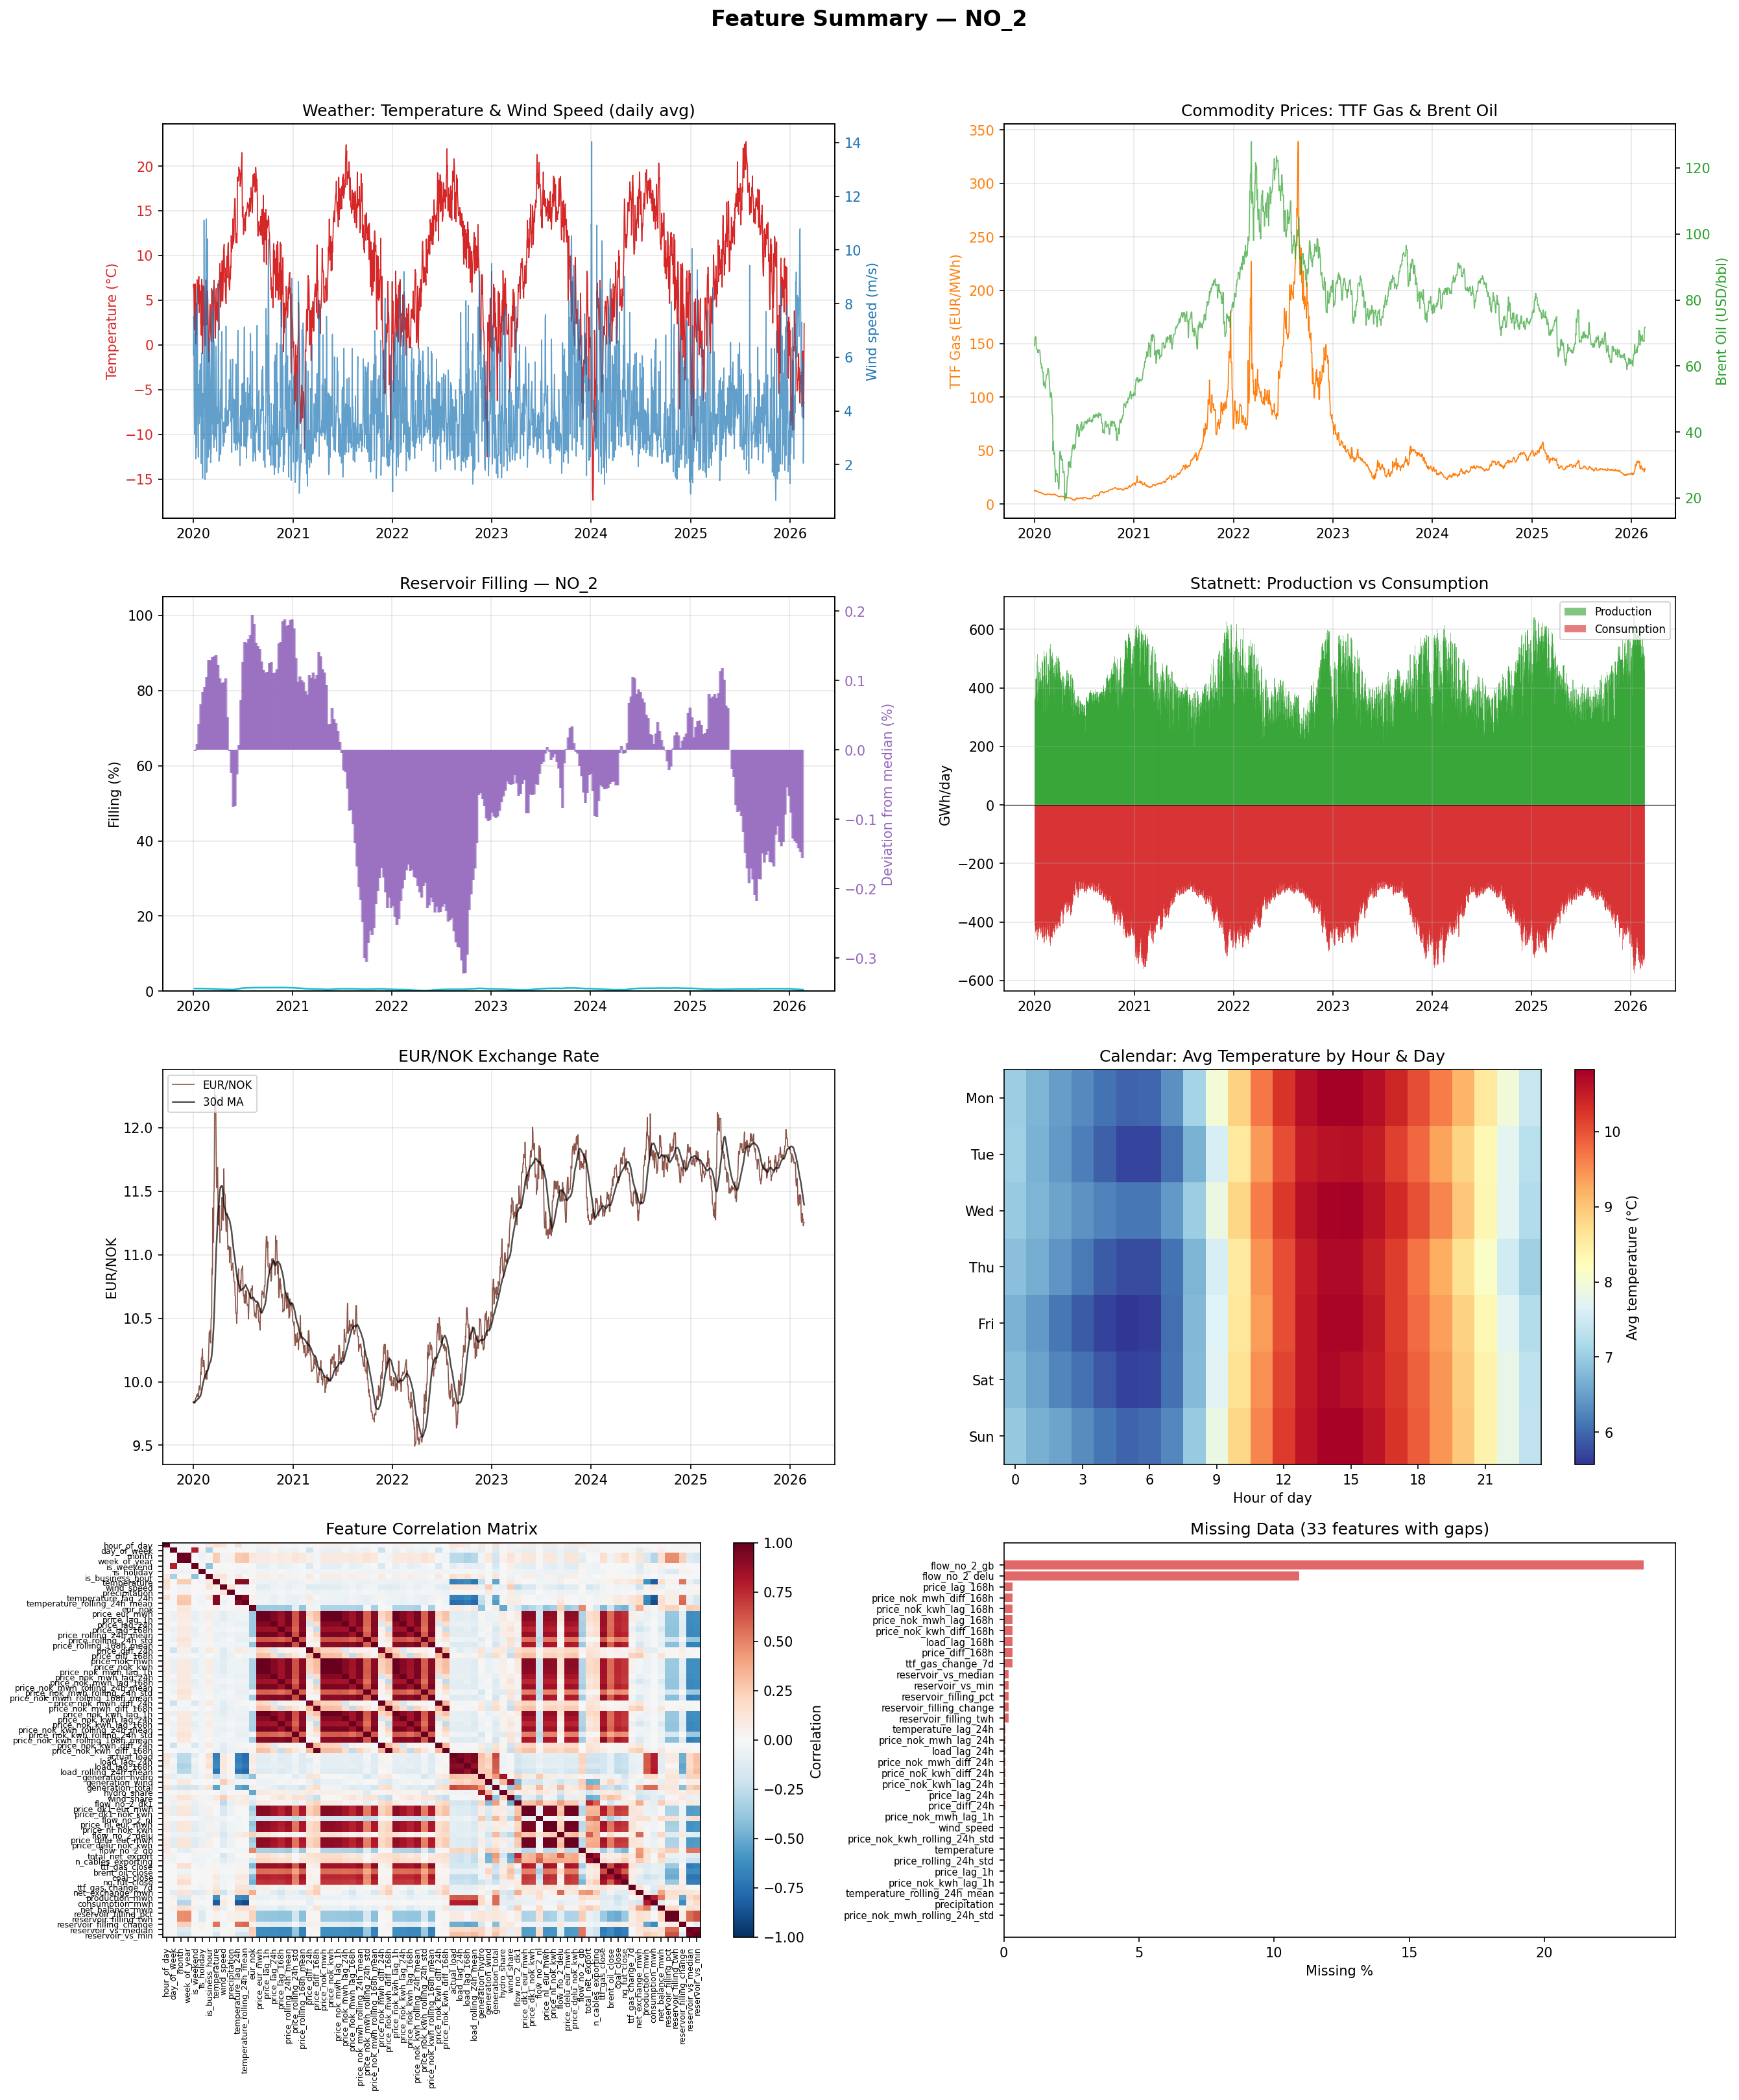


NO_3 — Midt-Norge (Trondheim)


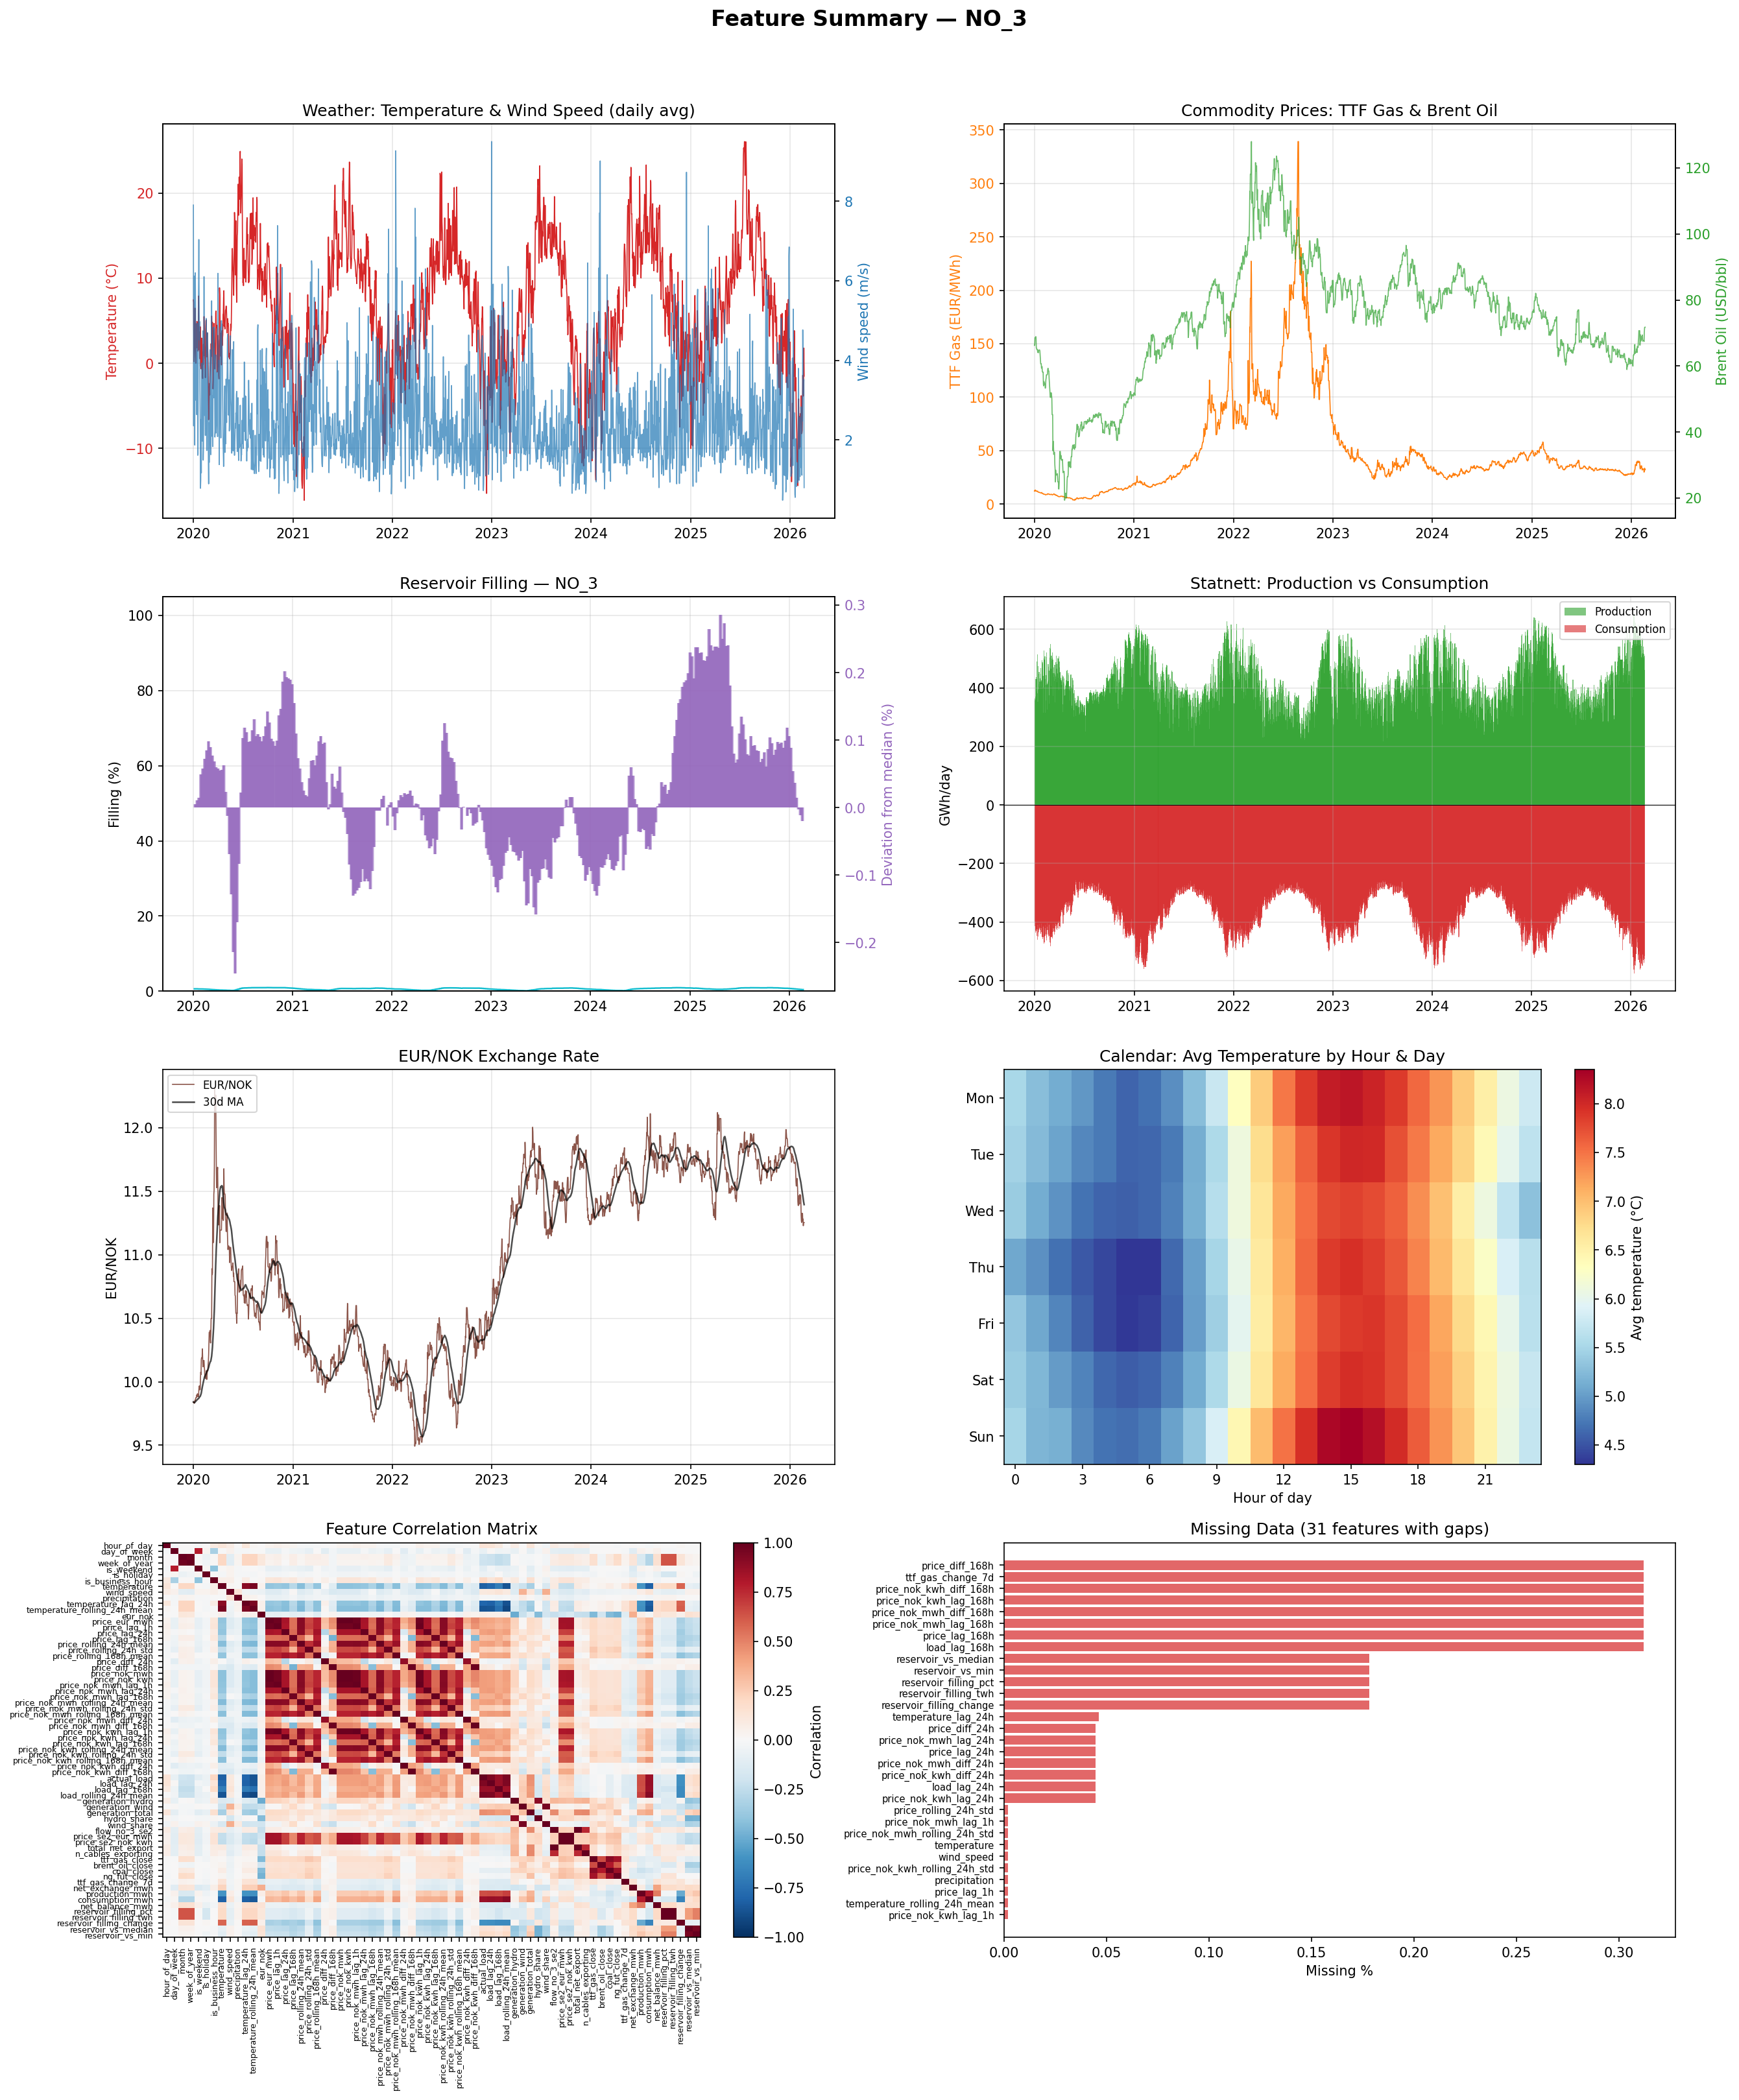


NO_4 — Nord-Norge (Tromsø)


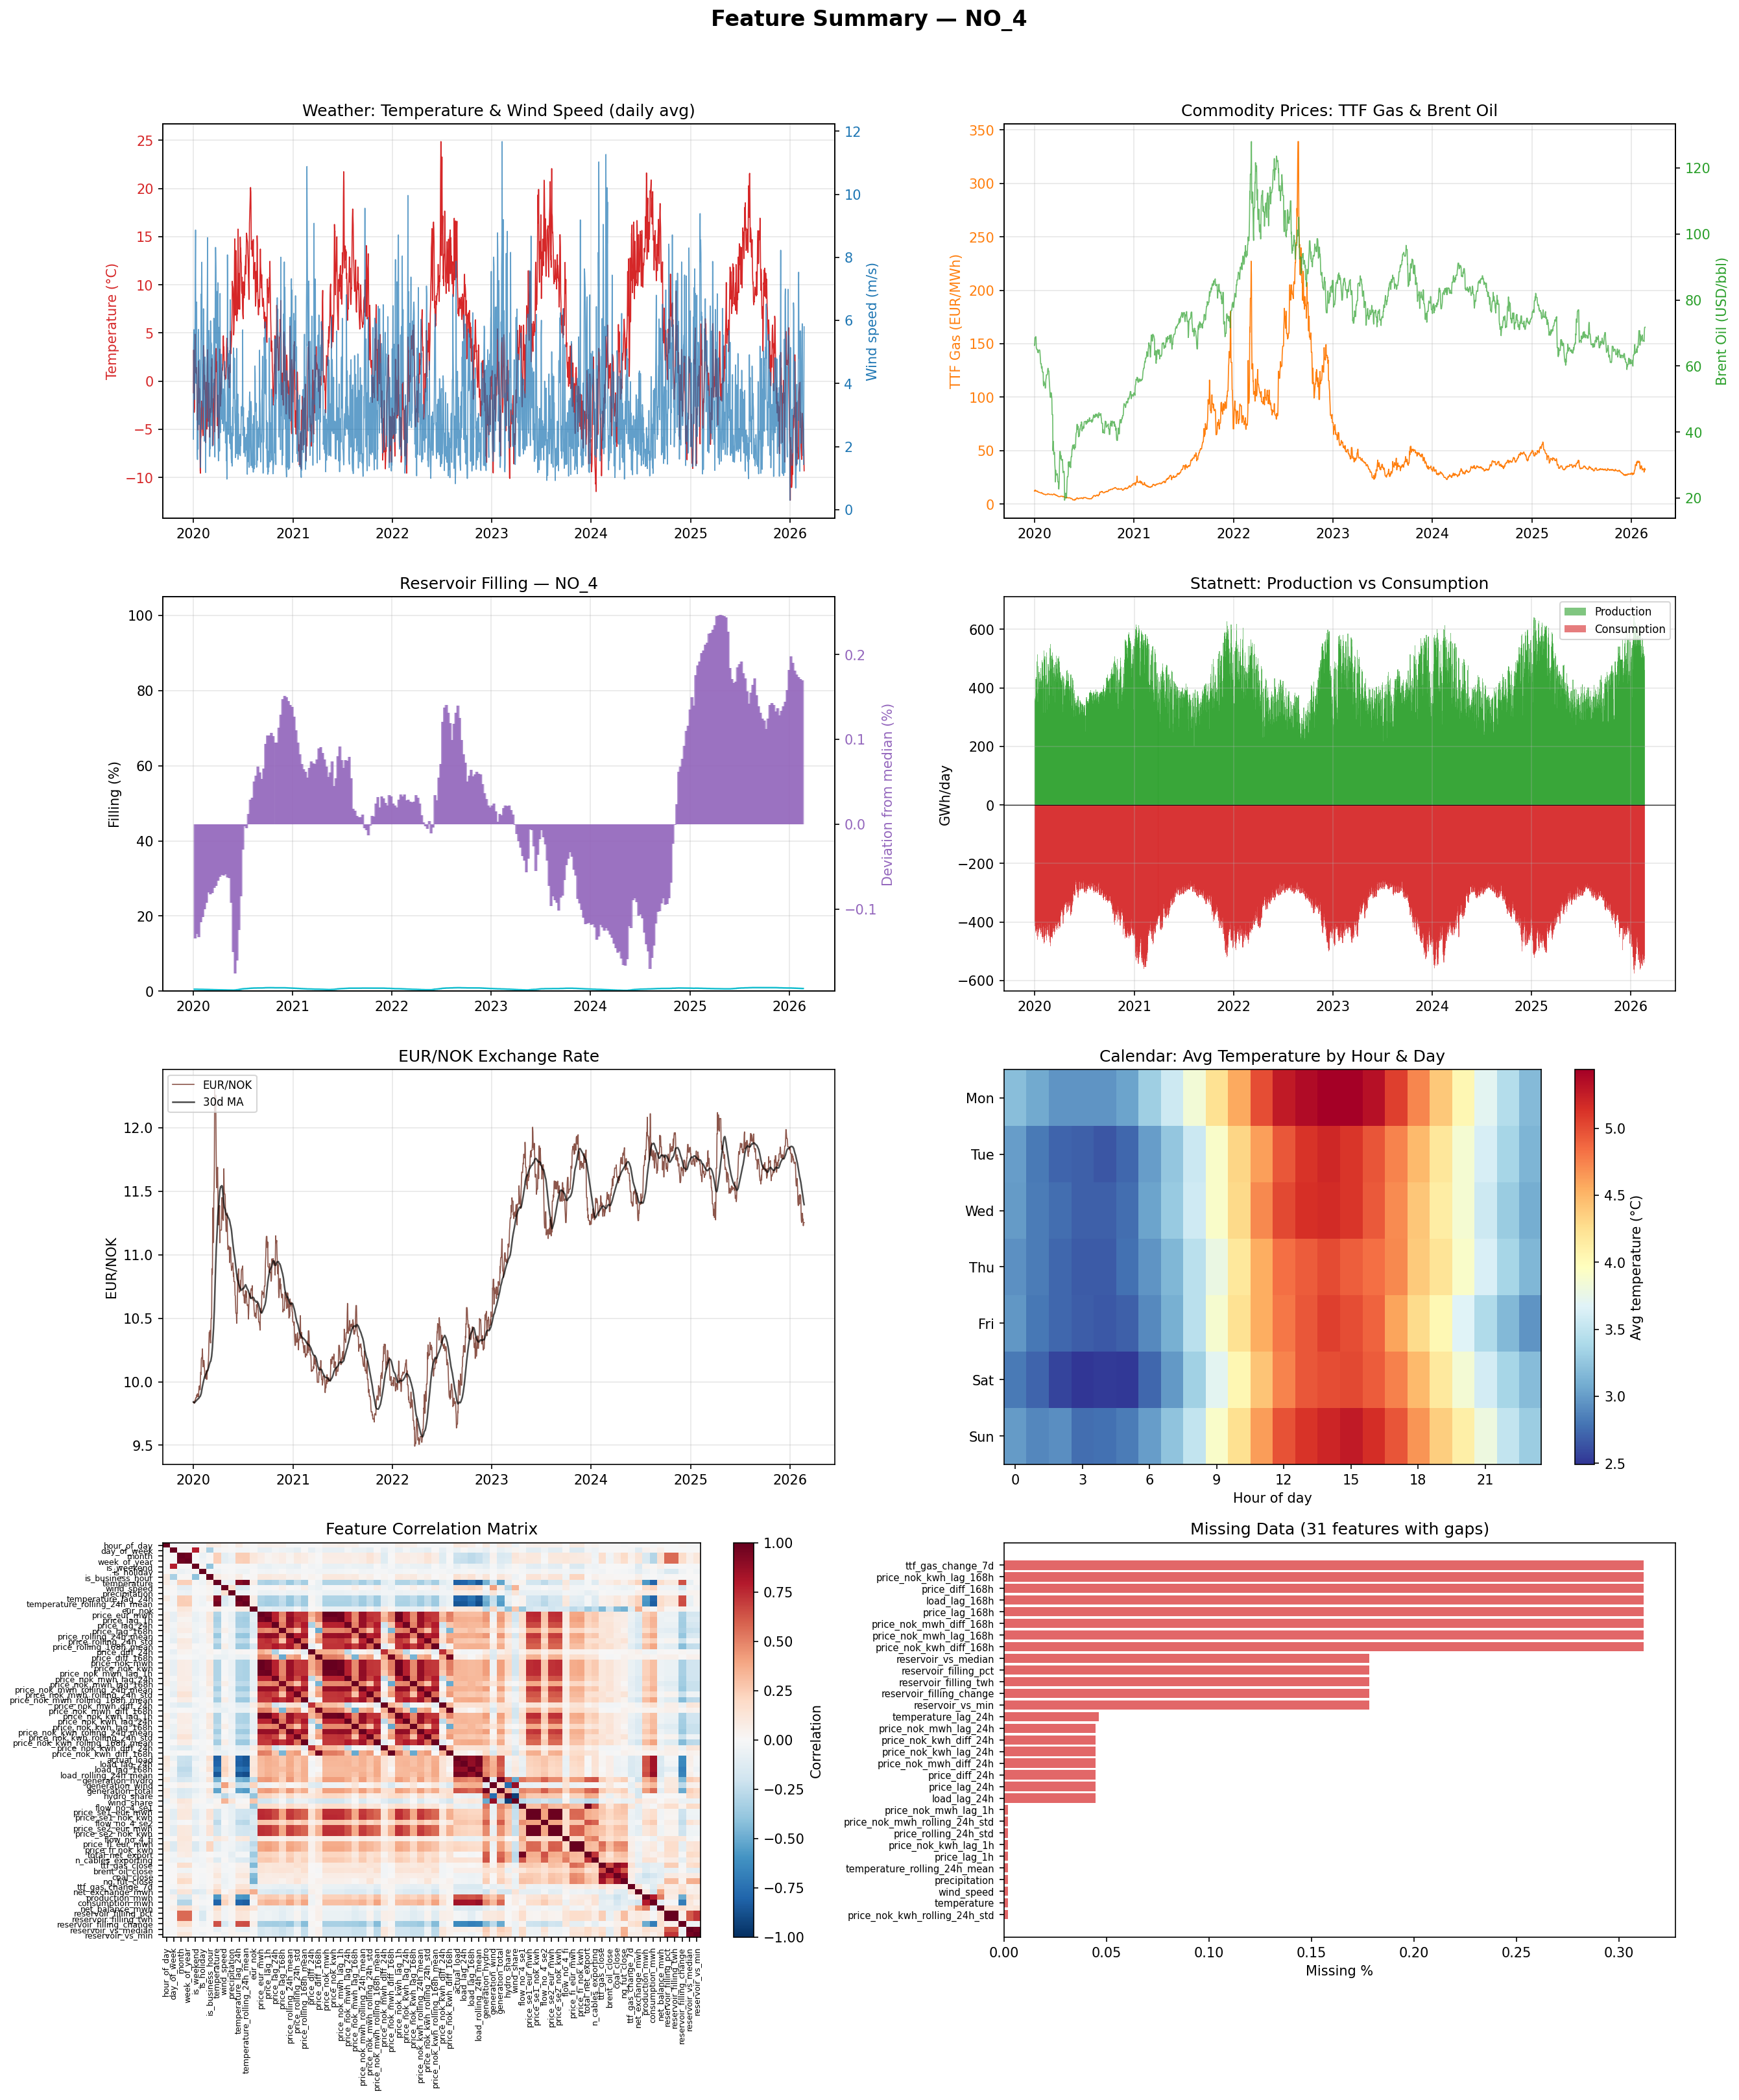


NO_5 — Vest-Norge (Bergen)


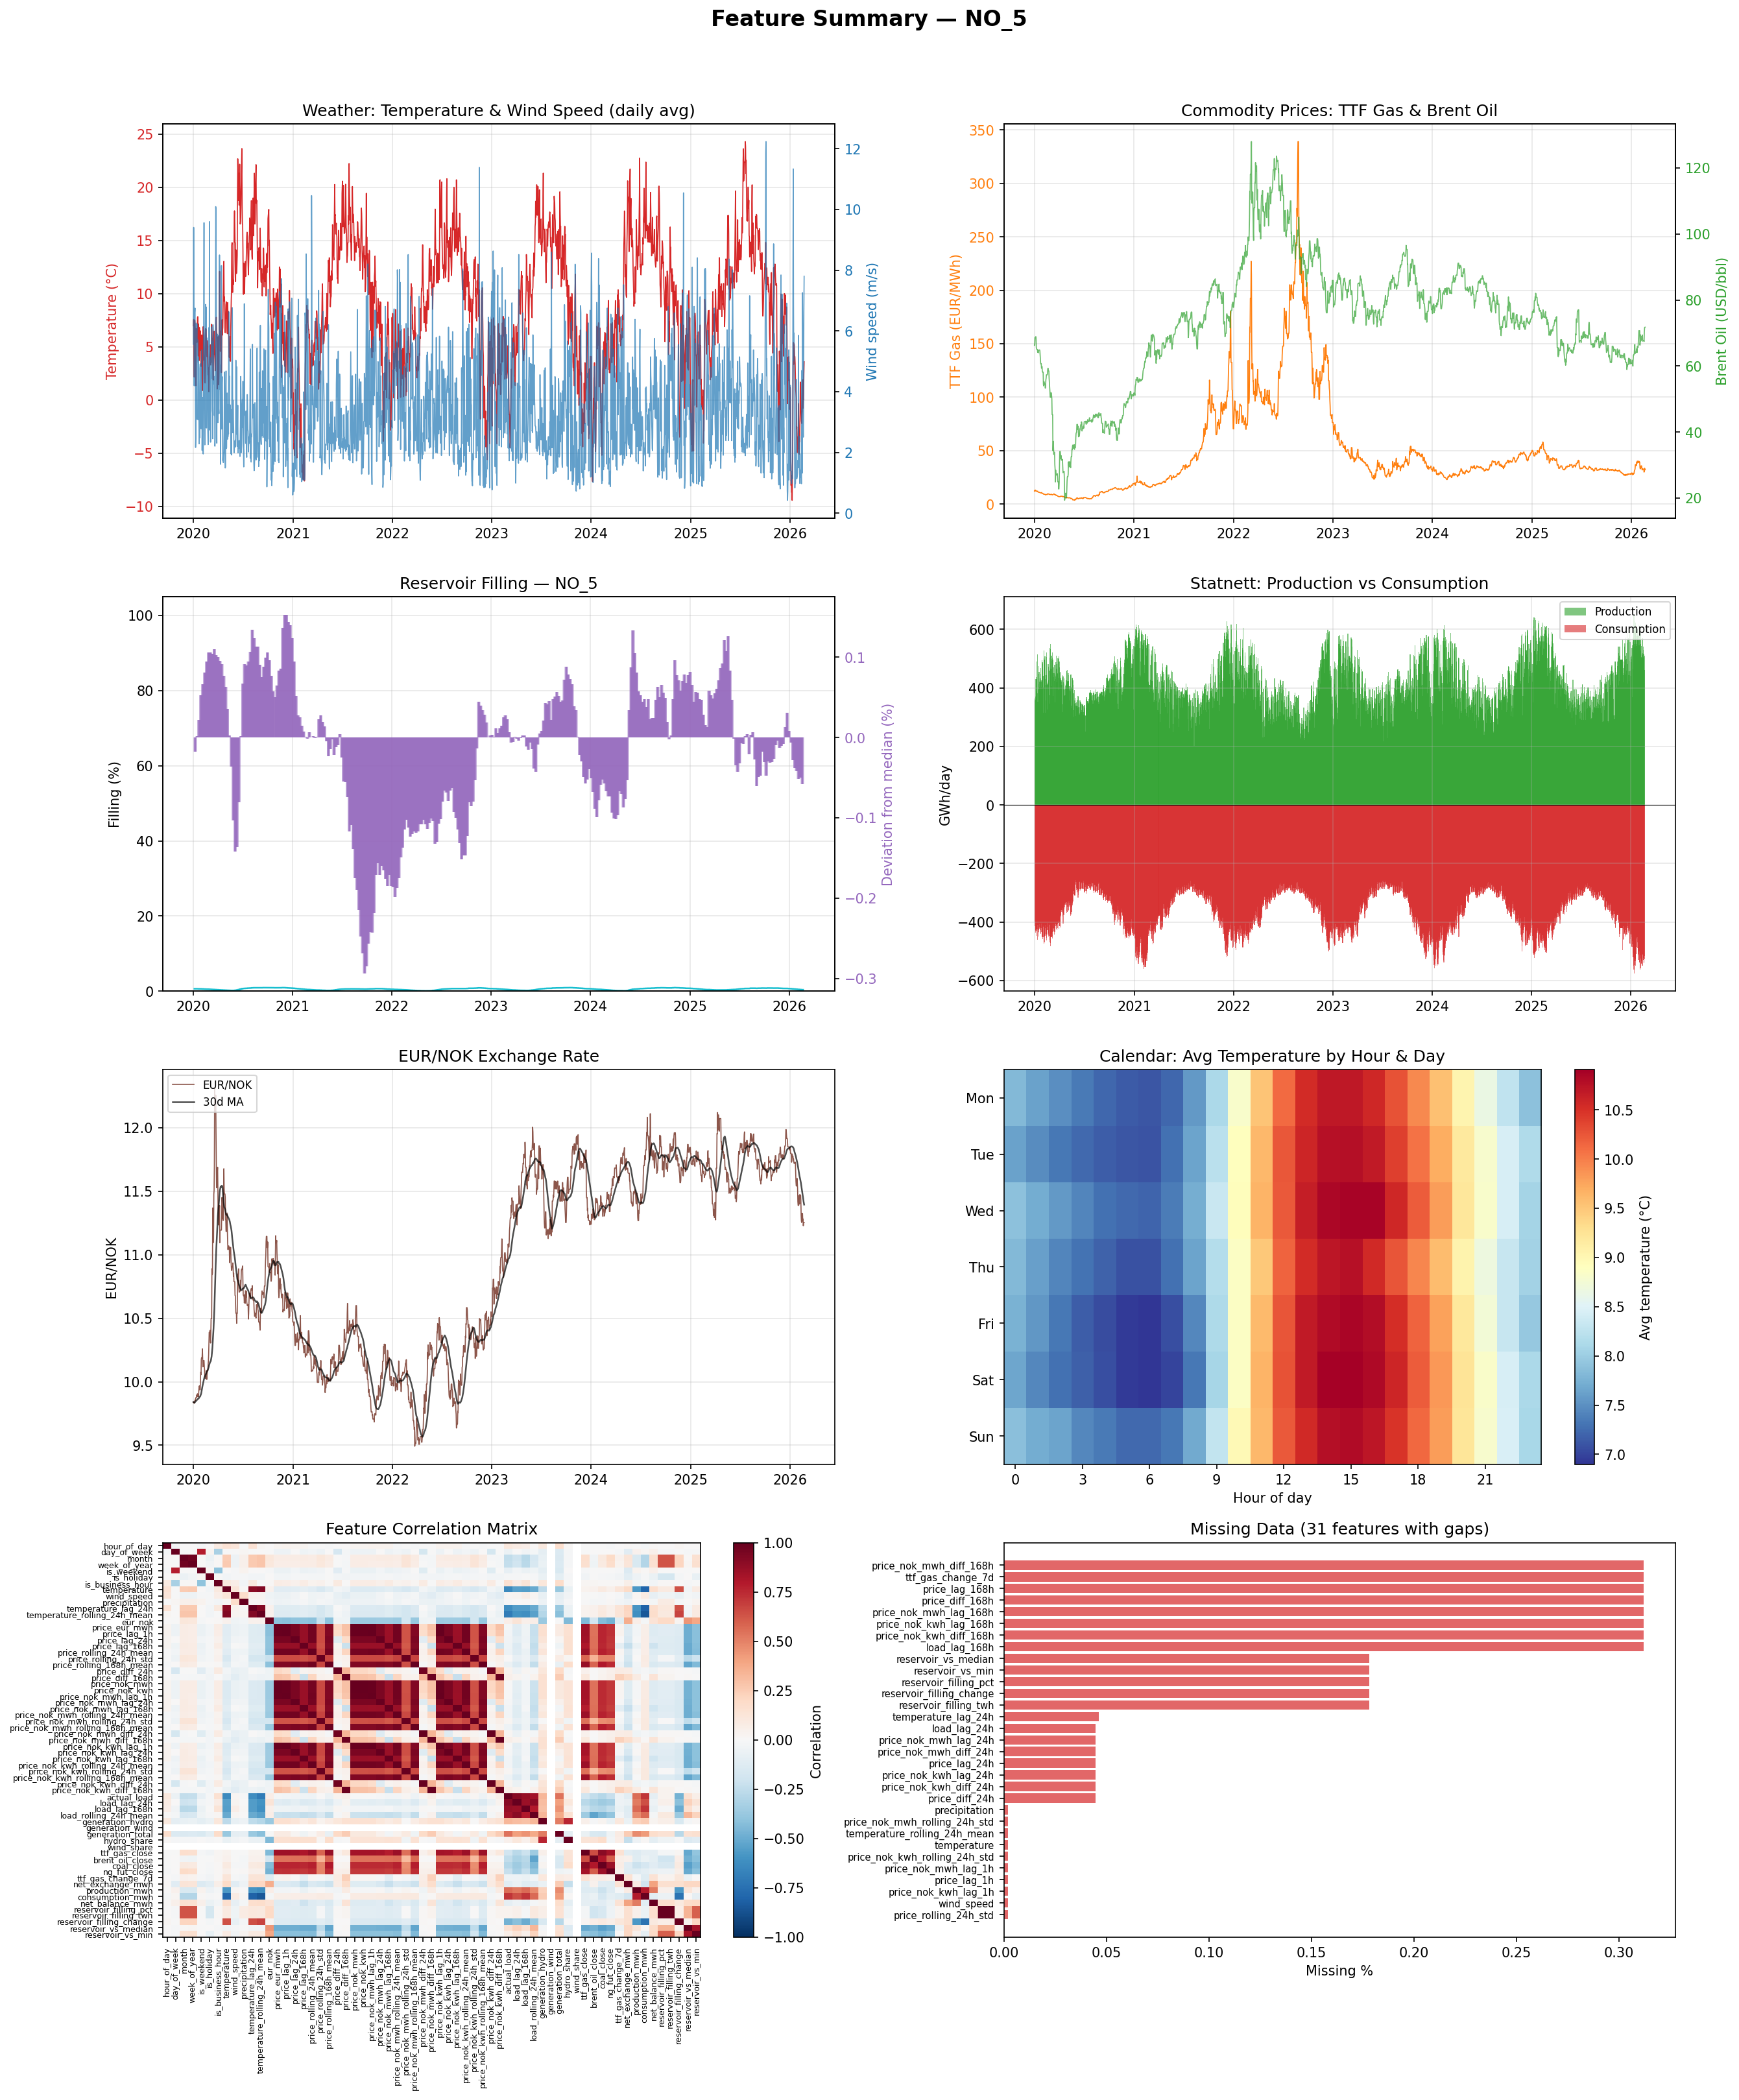

In [6]:
from IPython.display import Image, display

artifacts_dir = Path("../artifacts")
for zone in all_dfs:
    plot_path = artifacts_dir / f"feature_summary_{zone}.png"
    if plot_path.exists():
        print(f"\n{'='*60}")
        print(f"{zone} — {ZONE_LABELS[zone]}")
        print(f"{'='*60}")
        display(Image(filename=str(plot_path), width=800))

## Done!

All 5 zone feature matrices are built and cached. You can now:
- Load any zone with `pd.read_parquet(f"../data/processed/features_{zone}_{START}_{END}.parquet")`
- Proceed to **06_zone_comparison** for cross-zone analysis
- Proceed to **Phase 3** (baseline models) when ready